In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import load_stock_data, logreturn
%matplotlib inline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler
from IPython.display import display

from utils import load_ds1, load_ds2
import numpy as np

In [4]:
data = load_ds2()

In [14]:
def plot_error_charts(data, sym):
   
    ds = data[sym]

    X = ds.X_train
    Y = ds.Y_train

    vol = X['vol']
    future_vol = Y.iloc[:,0]

    print sym, "vol", "mean:", vol.mean(), "median", vol.median(), "std", vol.std()
    #vol.hist(bins=200)
    rel_error_baseline = vol.std()
    ps = []

    ma_corrs = []
    ma_r2s = []
    ma_rmses = []
    ma_maes = []
    ma_rel_rmses = []
    ma_rel_maes = []

    ewma_corrs = []
    ewma_r2s = []
    ewma_rmses = []
    ewma_maes = []

    ewma_rel_rmses = []
    ewma_rel_maes = []

    for p in np.arange(40)+1:
        ps.append(p)
        ma_col = 'ma-{}'.format(p)
        ewma_col = 'ewma-{}'.format(p)

        ma = X[ma_col]
        ewma = X[ewma_col]

        # scores
        ma_r2s.append(r2_score(ma, future_vol))
        ma_corrs.append(ma.corr(future_vol))

        ma_rmse = np.sqrt(mean_squared_error(ma, future_vol))
        ma_rmses.append(ma_rmse)
        ma_mae = mean_absolute_error(ma, future_vol)
        ma_maes.append(ma_mae)

        ma_rel_rmses.append(ma_rmse/rel_error_baseline)
        ma_rel_maes.append(ma_mae/rel_error_baseline)
  

        ewma_r2s.append(r2_score(ewma, future_vol))
        ewma_corrs.append(ewma.corr(future_vol))
        ewma_rmse = np.sqrt(mean_squared_error(ewma, future_vol))
        ewma_rmses.append(ewma_rmse)
        ewma_mae = mean_absolute_error(ewma, future_vol)
        ewma_maes.append(ewma_mae)

        ewma_rel_rmses.append(ewma_rmse/rel_error_baseline)
        ewma_rel_maes.append(ewma_mae/rel_error_baseline)

    n_subplots = 3
    f, axes = plt.subplots(1,n_subplots, figsize=(12,4), sharey=False, sharex=True)

    p = 0
    axes[p].plot(ps, ma_rel_rmses, label='ma')
    axes[p].plot(ps, ewma_rel_rmses, label='emwa')
    axes[p].set_title('rel rmse')
    axes[p].legend()
    p+=1
    axes[p].plot(ps, ma_rel_maes, label='ma')
    axes[p].plot(ps, ewma_rel_maes, label='emwa')
    axes[p].set_title('rel mae')
    axes[p].legend()
    p+=1
#     axes[p].plot(ps, ma_rmses, label='ma')
#     axes[p].plot(ps, ewma_rmses, label='emwa')
#     axes[p].set_title('rmse')
#     axes[p].legend()
#     p+=1
#     axes[p].plot(ps, ma_maes, label='ma')
#     axes[p].plot(ps, ewma_maes, label='emwa')
#     axes[p].set_title('mae')
#     axes[p].legend()
#     p+=1
    axes[p].plot(ps, ma_corrs, label='ma')
    axes[p].plot(ps, ewma_corrs, label='ewma (x = halflife)')
    axes[p].set_title('correlation')
    axes[p].legend()
#     p+=1
#     axes[p].plot(ps, ma_r2s, label='ma')
#     axes[p].plot(ps, ewma_r2s, label='emwa')
#     axes[p].set_title('r2 score')
#     axes[p].legend()

# TODO: compute argmin rel mse, rel mae, argmax correlation, for ewma and ma.

--------------- COP -------------------
COP vol mean: 0.0135200080966 median 0.0103881924326 std 0.0126453015463


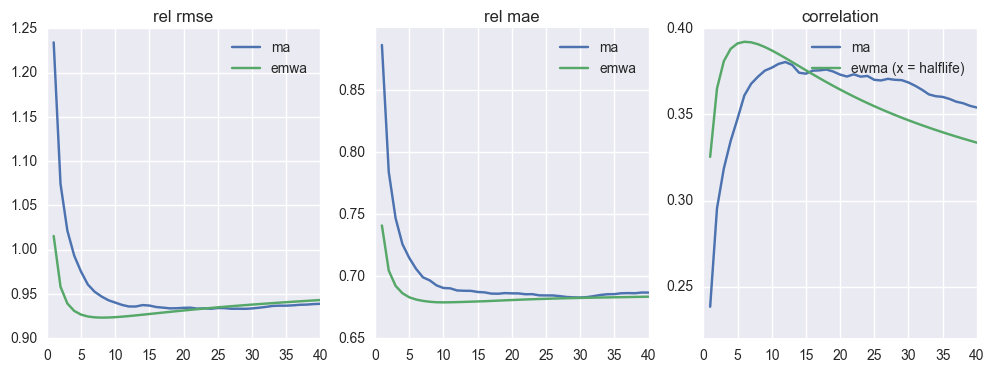

--------------- AXP -------------------
AXP vol mean: 0.0158932595459 median 0.0111849424601 std 0.0163030077443


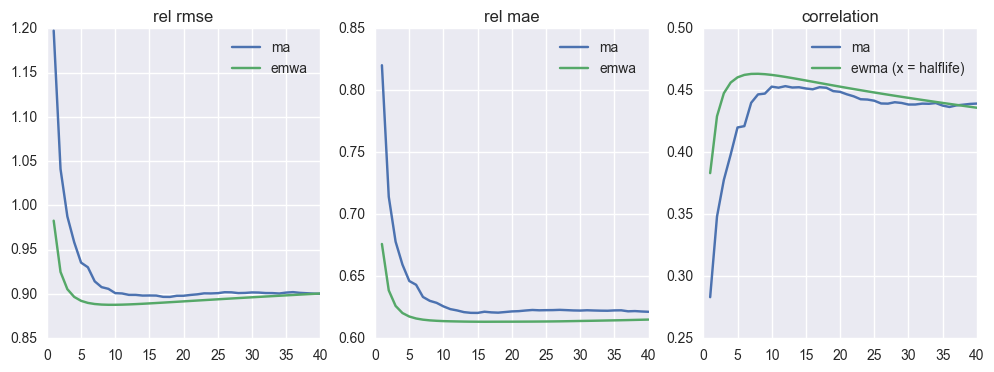

--------------- EOG -------------------
EOG vol mean: 0.0178701337747 median 0.0138264012799 std 0.0168273047979


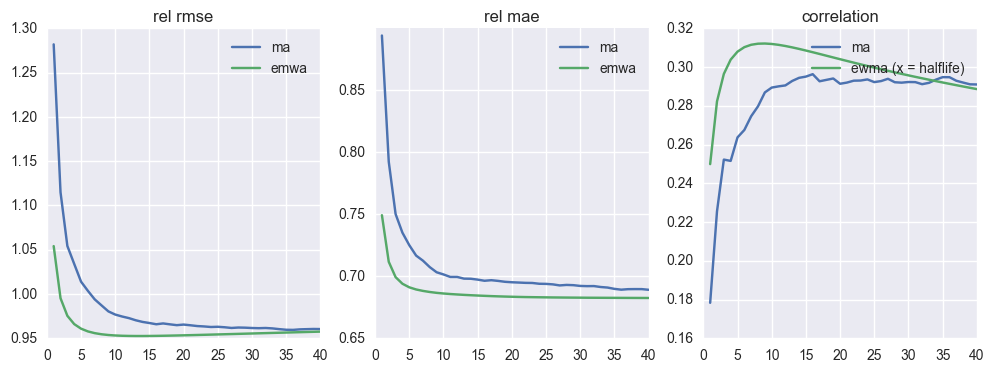

--------------- BA -------------------
BA vol mean: 0.0140232134713 median 0.0104366917072 std 0.014058537939


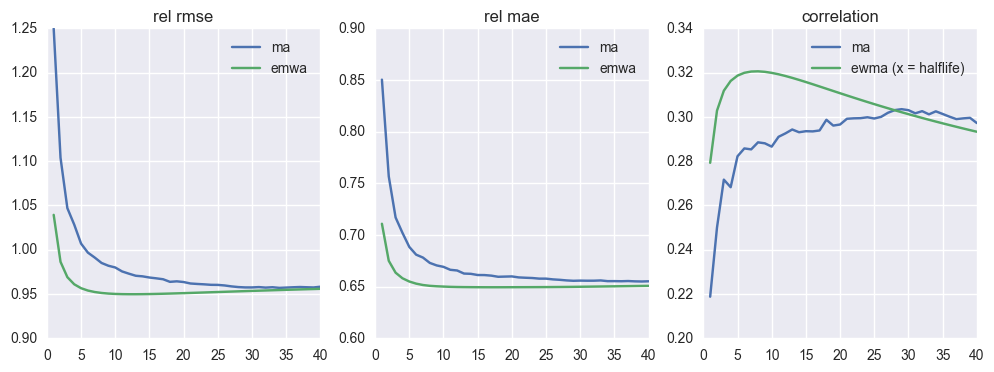

--------------- CVX -------------------
CVX vol mean: 0.0114859130426 median 0.00892055870239 std 0.0111525257381


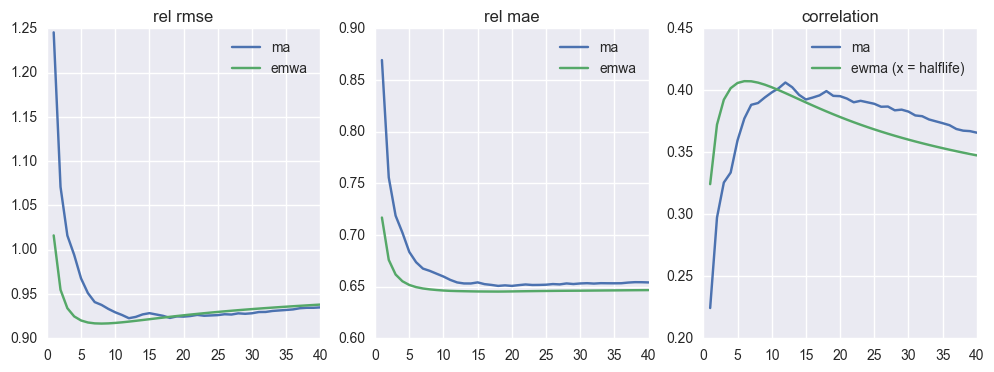

--------------- TJX -------------------
TJX vol mean: 0.0174351223105 median 0.0128238400581 std 0.0169710151703


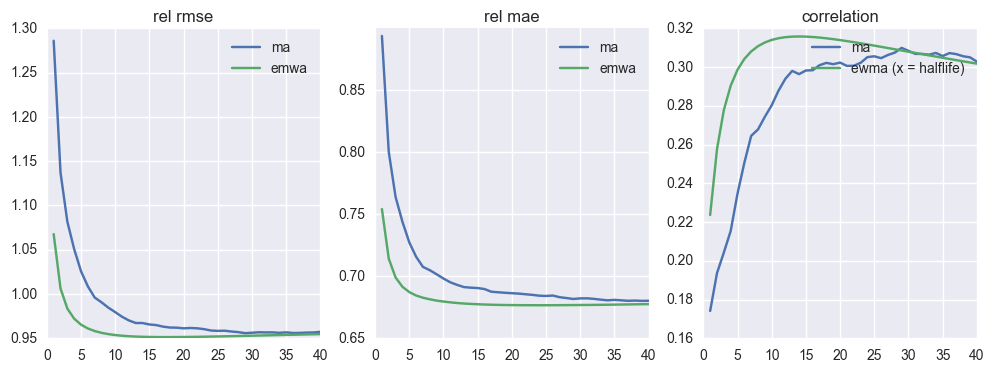

--------------- KO -------------------
KO vol mean: 0.0111874811336 median 0.00822206007465 std 0.0110230011649


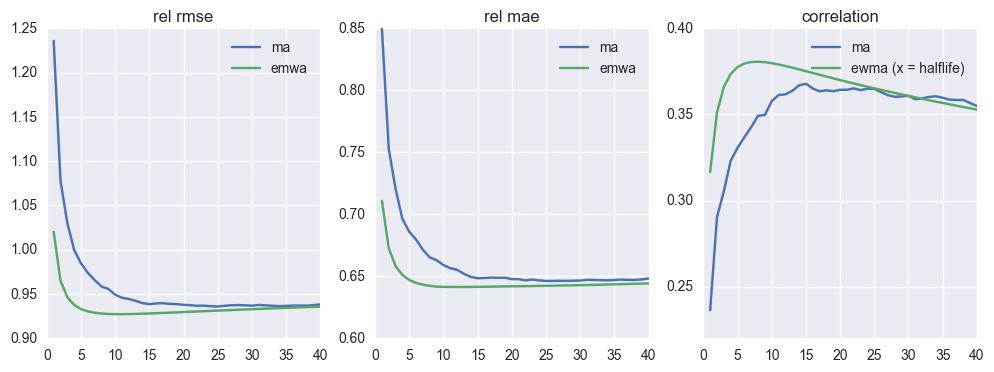

--------------- AAPL -------------------
AAPL vol mean: 0.0227607358166 median 0.0170059818036 std 0.0241408867641


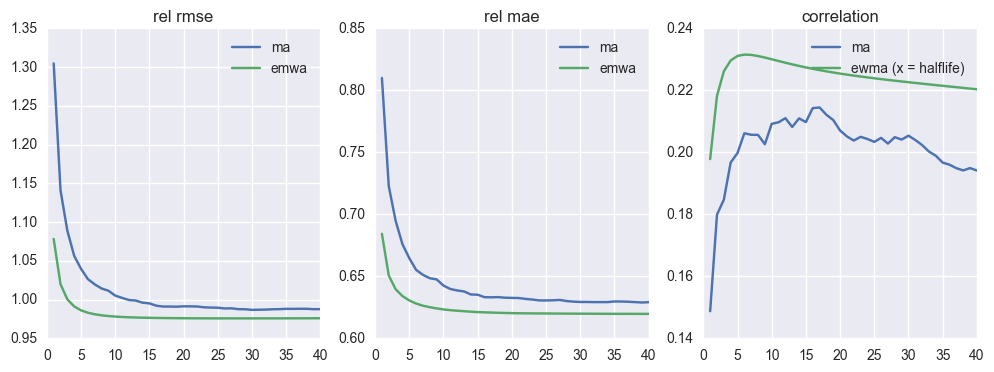

--------------- DE -------------------
DE vol mean: 0.0156785669171 median 0.0116026442802 std 0.0150887262248


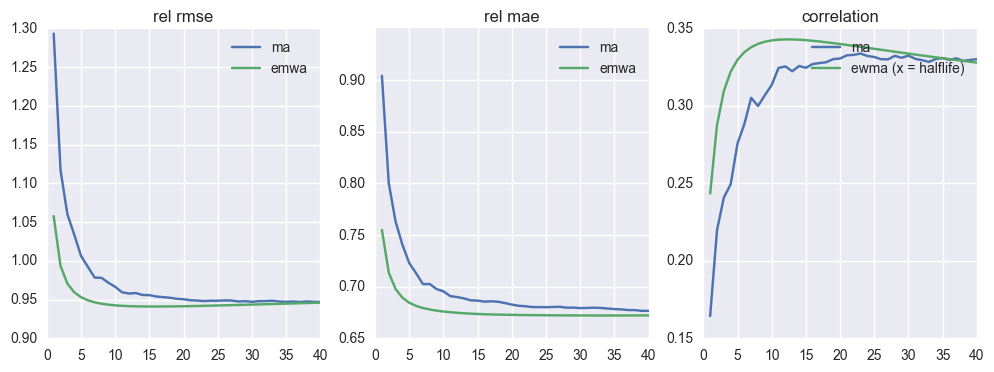

--------------- PEP -------------------
PEP vol mean: 0.0117001136066 median 0.00851673867124 std 0.011812256538


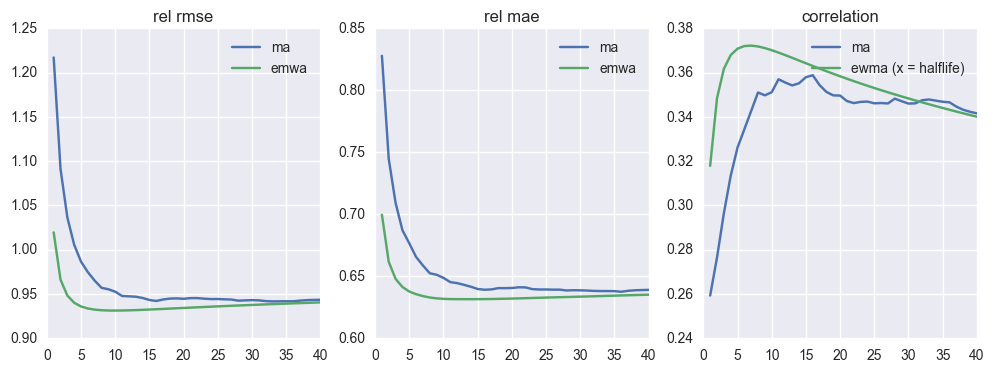

--------------- AMGN -------------------
AMGN vol mean: 0.0176926983583 median 0.0128217137055 std 0.0173497828383


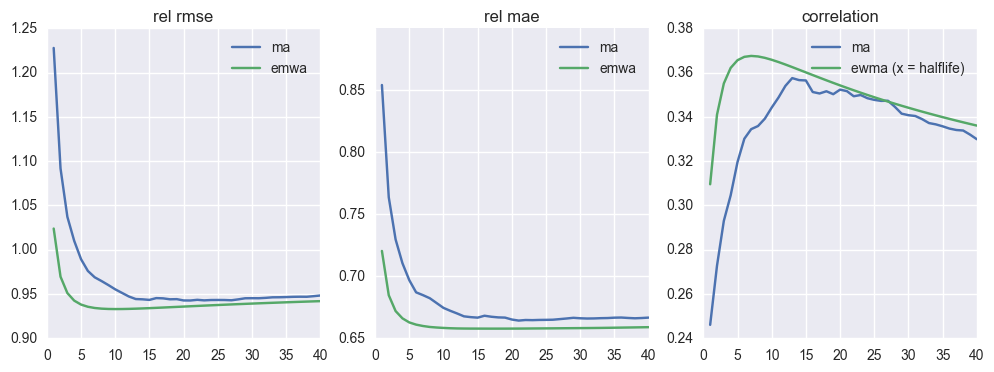

--------------- BAX -------------------
BAX vol mean: 0.0130279125983 median 0.00995058957996 std 0.0135798447316


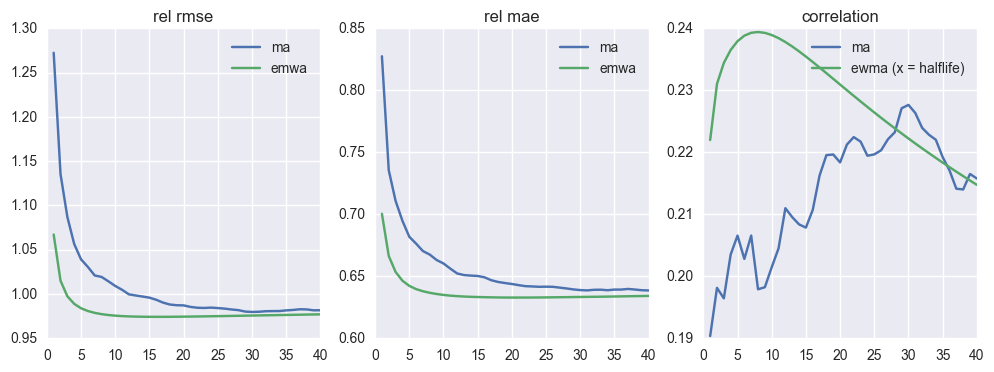

--------------- CAT -------------------
CAT vol mean: 0.0148545908567 median 0.0112648606073 std 0.0142127559926


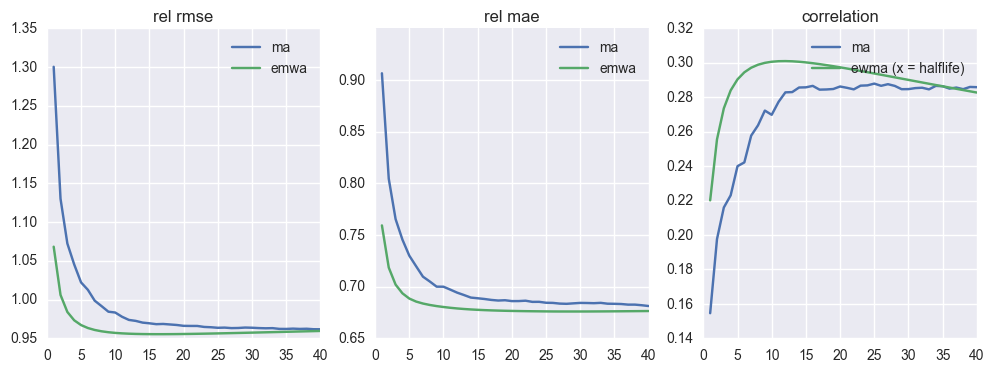

--------------- COST -------------------
COST vol mean: 0.016662324032 median 0.0125787741685 std 0.0163282023925


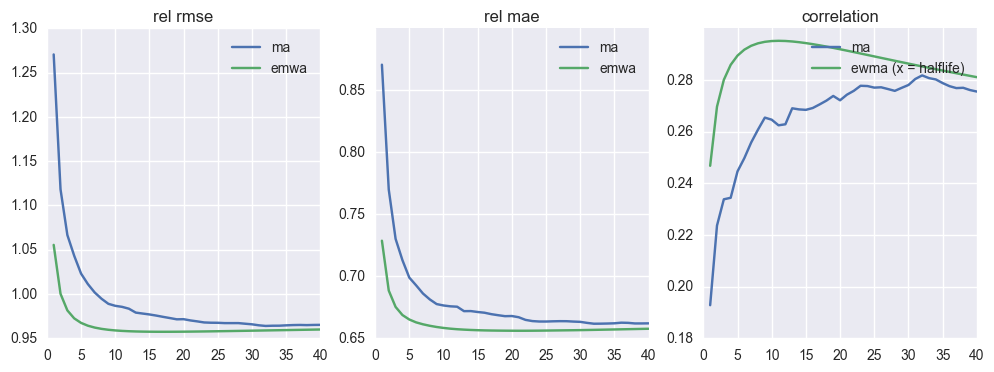

--------------- BAC -------------------
BAC vol mean: 0.0151013467601 median 0.00970117983857 std 0.0197363723732


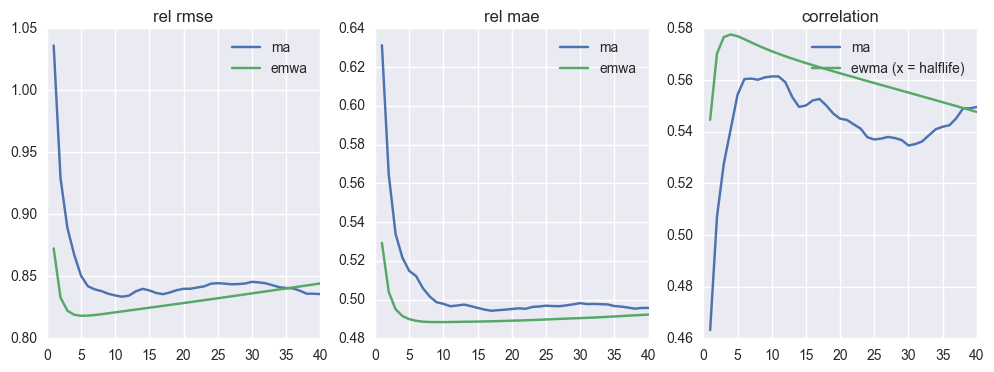

--------------- EMR -------------------
EMR vol mean: 0.0121438729581 median 0.00892675391593 std 0.0119502128999


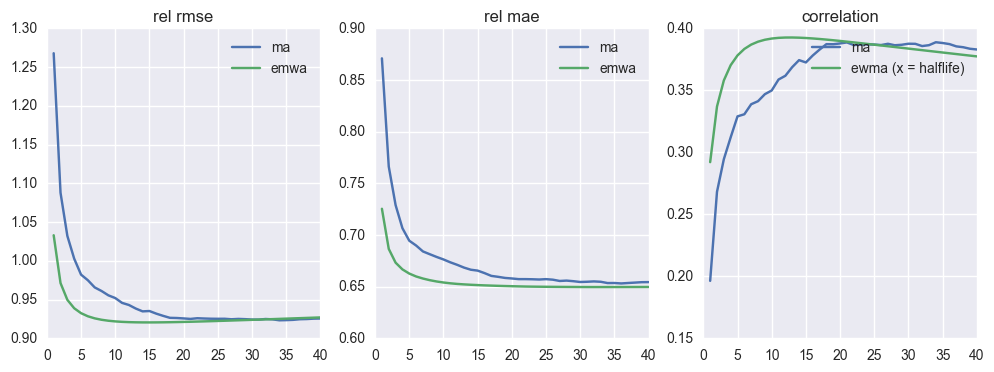

--------------- USB -------------------
USB vol mean: 0.0136601593756 median 0.00920672810261 std 0.015859782848


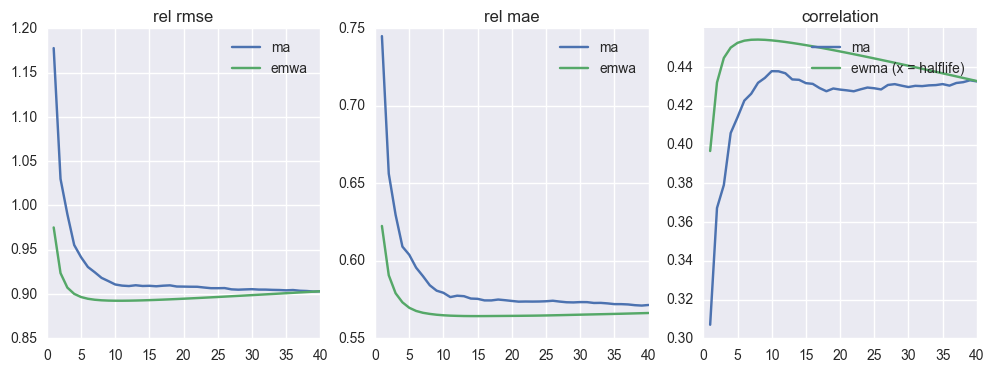

--------------- AIG -------------------
AIG vol mean: 0.0146459850391 median 0.00913246809087 std 0.026713084344


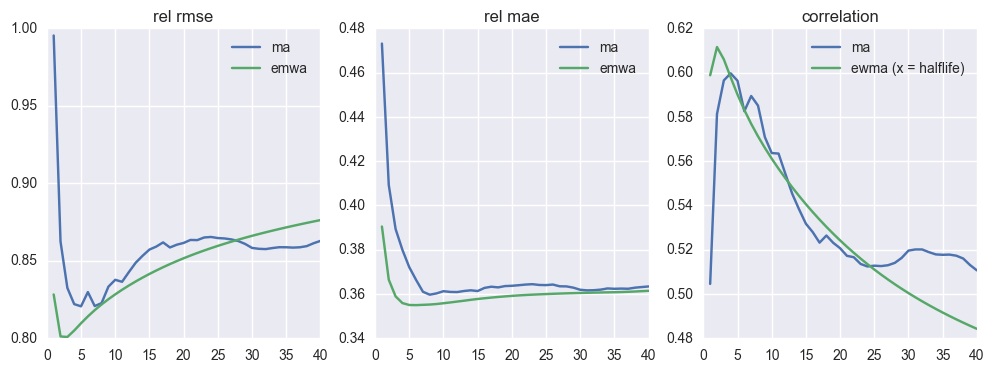

--------------- DOW -------------------
DOW vol mean: 0.0134223025193 median 0.00972153248874 std 0.013677577383


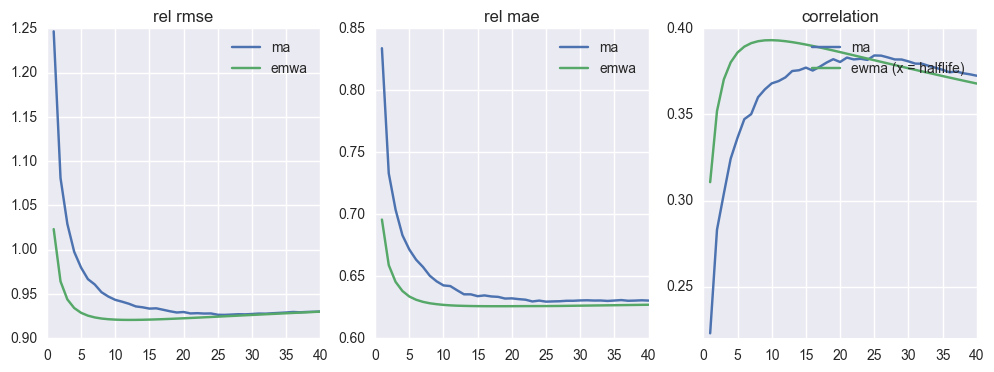

--------------- HD -------------------
HD vol mean: 0.0157598527662 median 0.011730634505 std 0.0156138068262


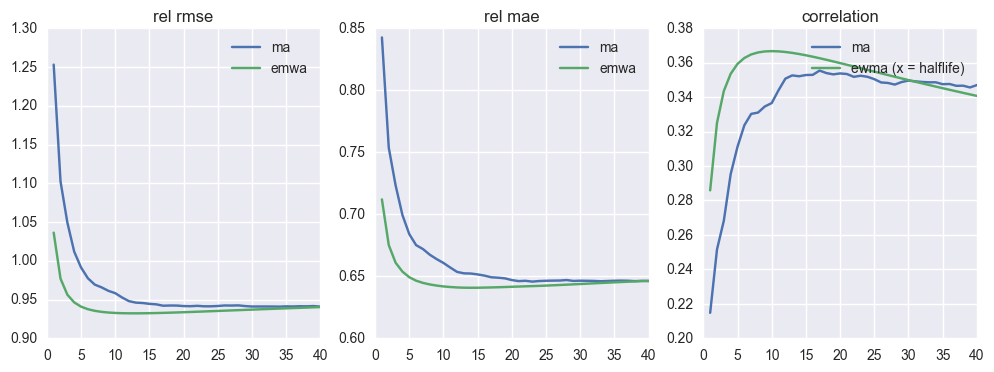

--------------- DIS -------------------
DIS vol mean: 0.0142628788554 median 0.010523711587 std 0.0143289011343


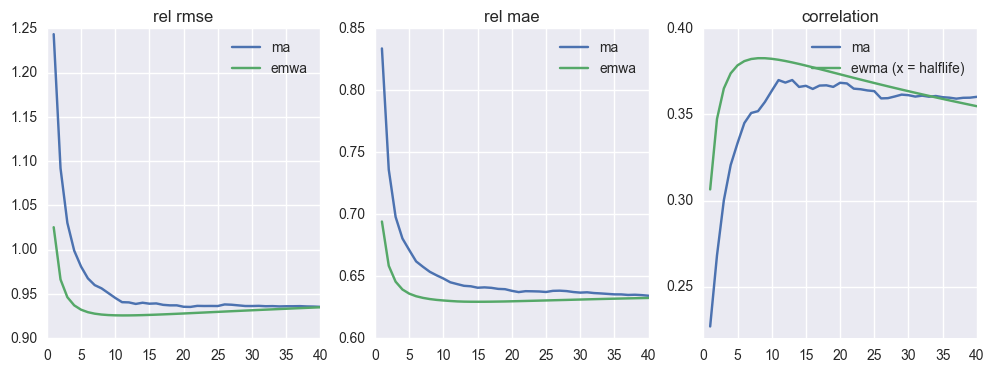

--------------- SBUX -------------------
SBUX vol mean: 0.0199124587986 median 0.014393257878 std 0.0197276282976


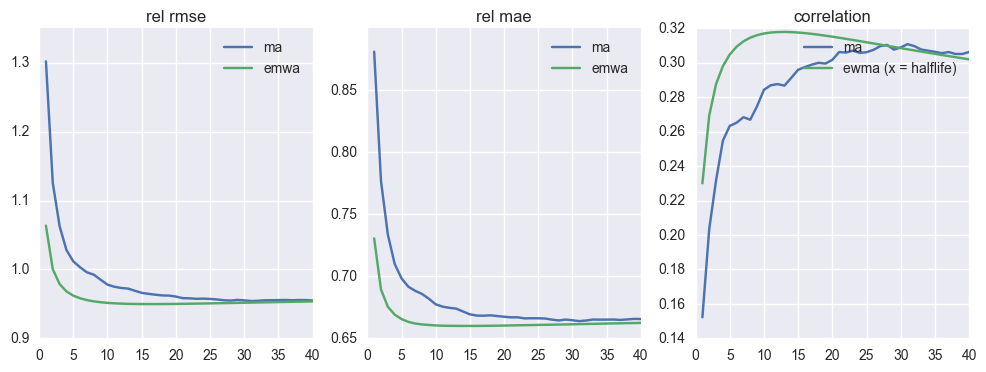

--------------- LLY -------------------
LLY vol mean: 0.0135420010408 median 0.00995042712875 std 0.0136180185122


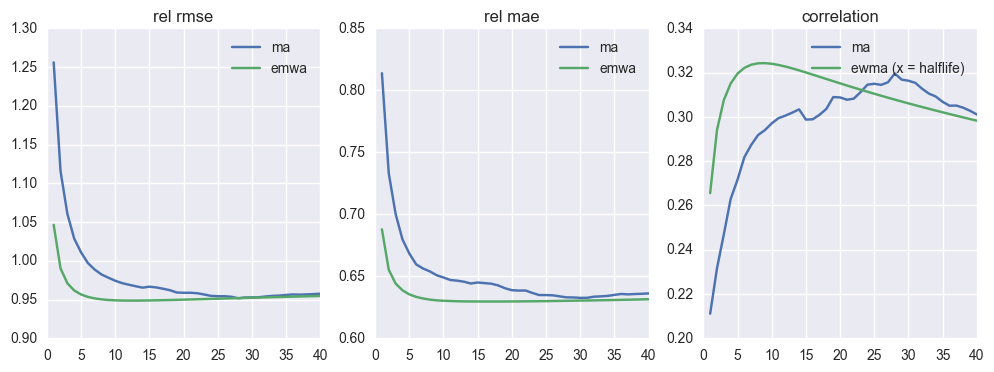

--------------- XOM -------------------
XOM vol mean: 0.0110896232555 median 0.00842554460499 std 0.0109204826521


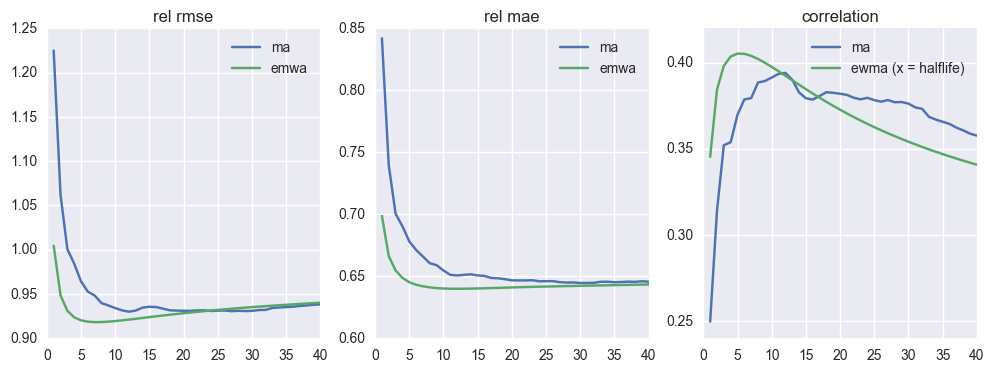

--------------- EMC -------------------
EMC vol mean: 0.0245761907874 median 0.0181322094347 std 0.0248456272123


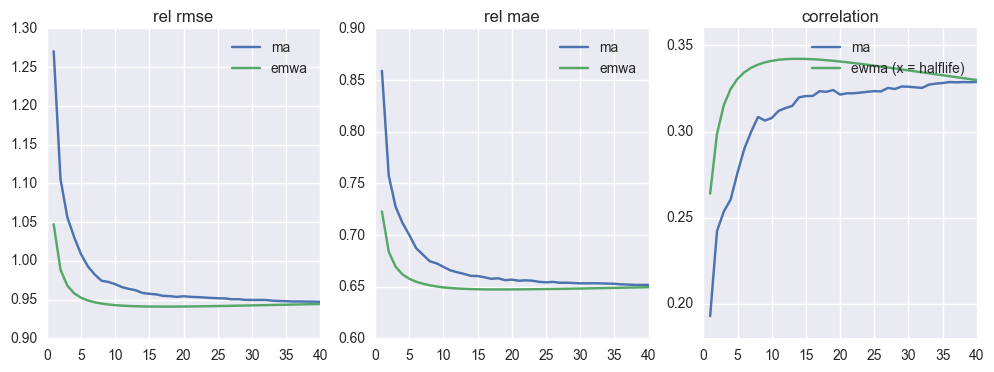

--------------- TGT -------------------
TGT vol mean: 0.0155745424843 median 0.0112215573032 std 0.0155901570876


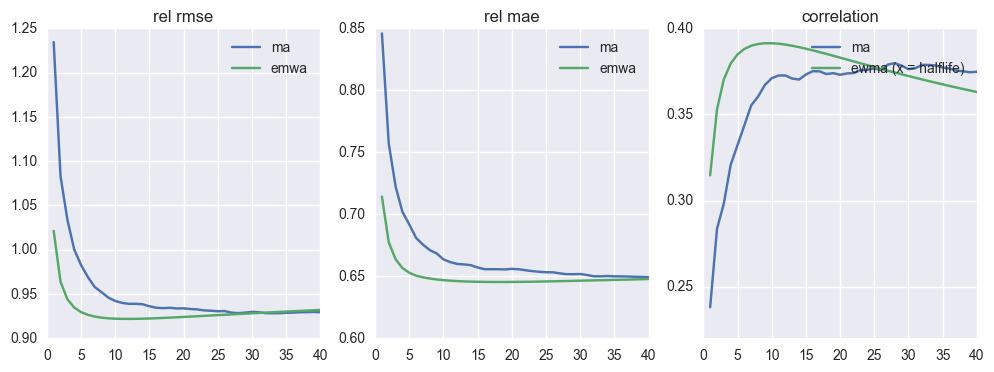

--------------- IBM -------------------
IBM vol mean: 0.0134695524292 median 0.00966970790857 std 0.0138472122409


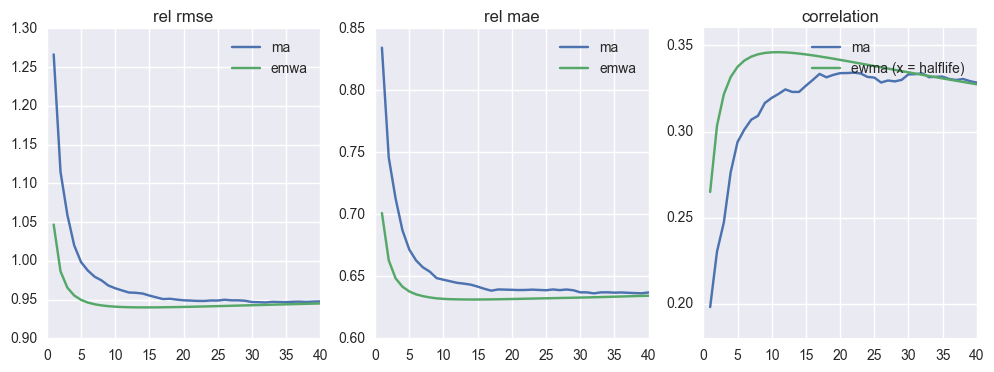

--------------- BIIB -------------------
BIIB vol mean: 0.0292651540688 median 0.0202091726239 std 0.0318326398102


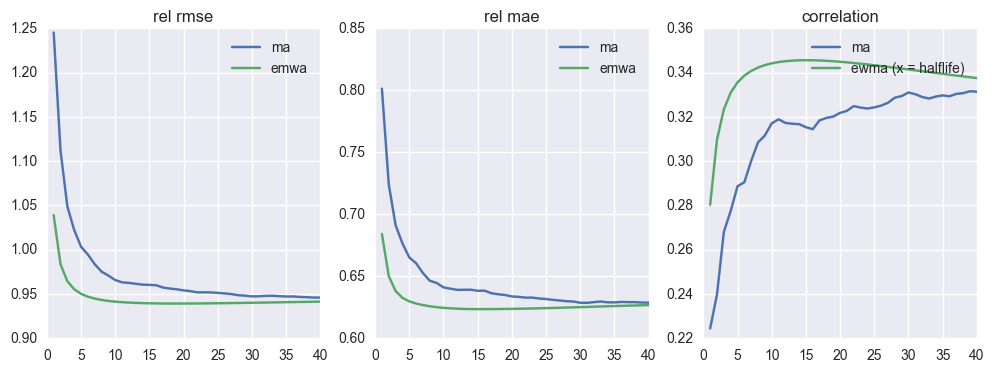

--------------- F -------------------
F vol mean: 0.0173130270478 median 0.0127219430153 std 0.0187235748903


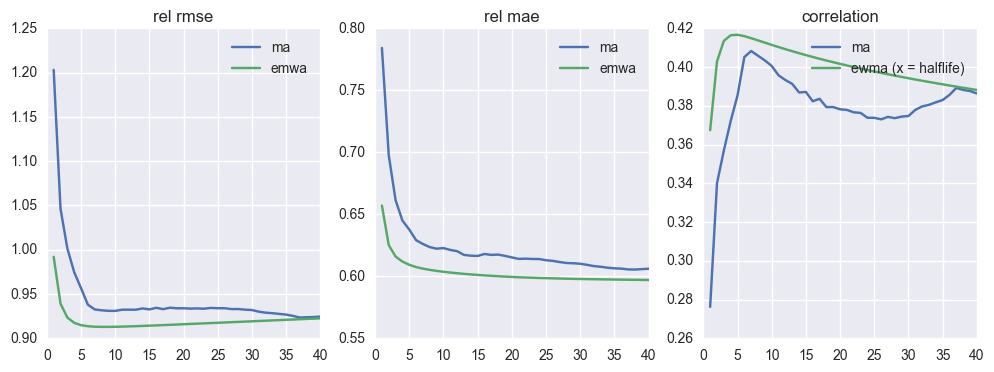

--------------- HON -------------------
HON vol mean: 0.0144985464589 median 0.0104655985861 std 0.0152495486014


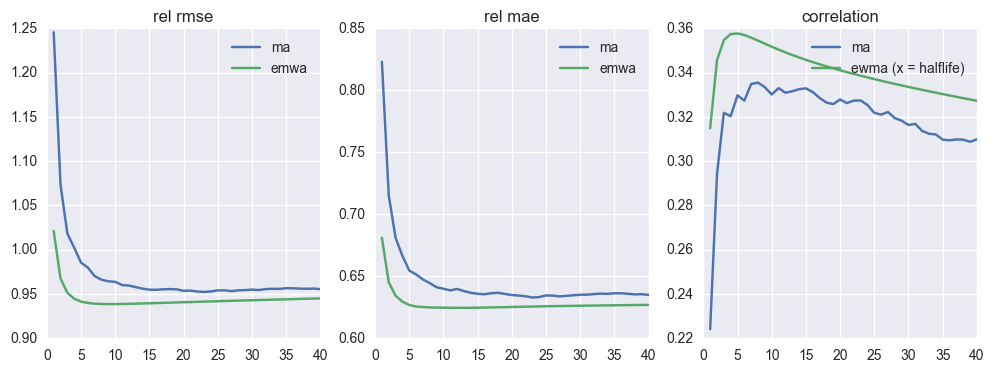

--------------- ORCL -------------------
ORCL vol mean: 0.0238228742829 median 0.0170938466673 std 0.0250863090501


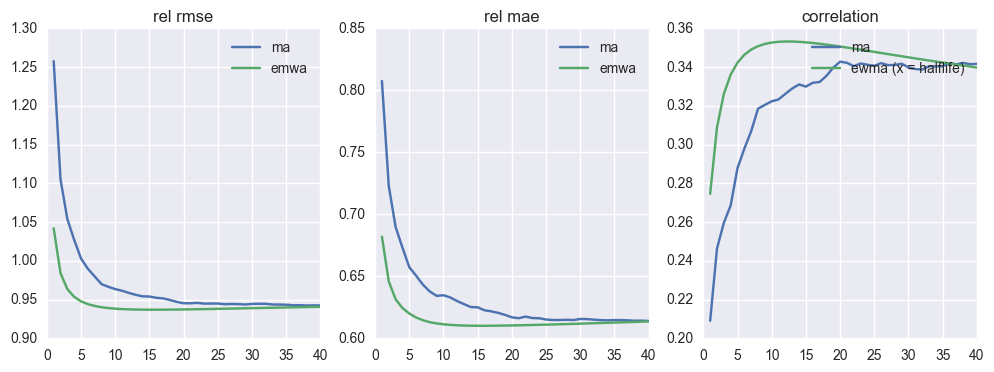

--------------- MSFT -------------------
MSFT vol mean: 0.0158972047689 median 0.0115290893446 std 0.0155405932997


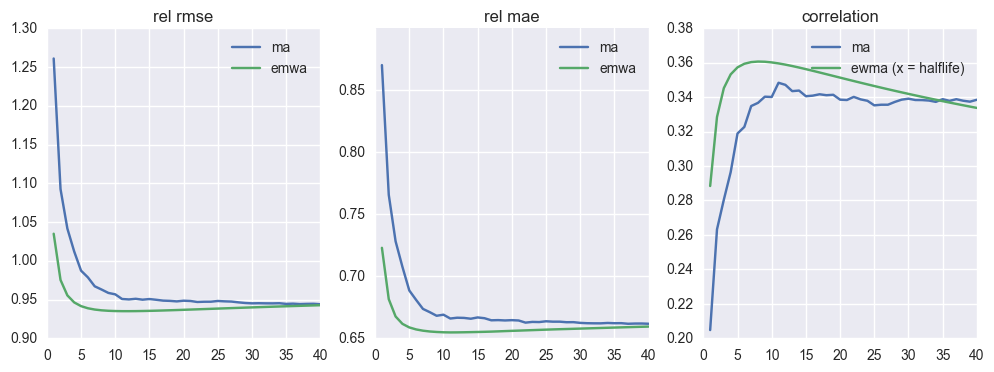

--------------- WFC -------------------
WFC vol mean: 0.0137748187752 median 0.00947882854034 std 0.0164080066997


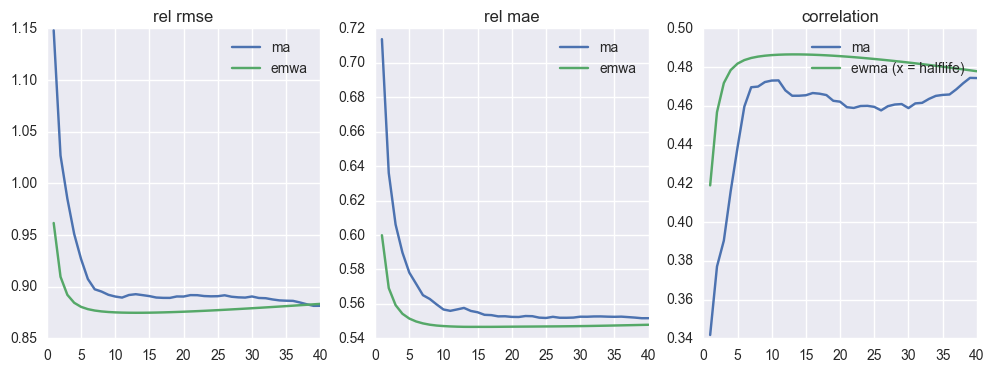

--------------- QCOM -------------------
QCOM vol mean: 0.0258581431903 median 0.01863995905 std 0.0254086833837


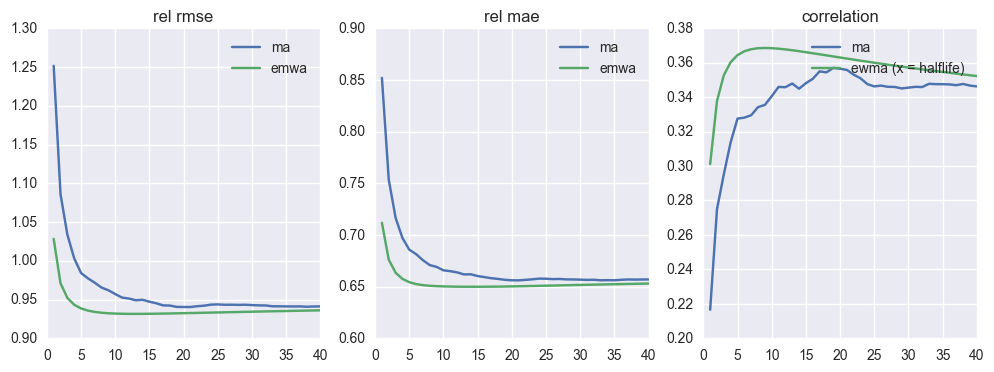

--------------- BMY -------------------
BMY vol mean: 0.0127480914988 median 0.00923770832603 std 0.0132650053256


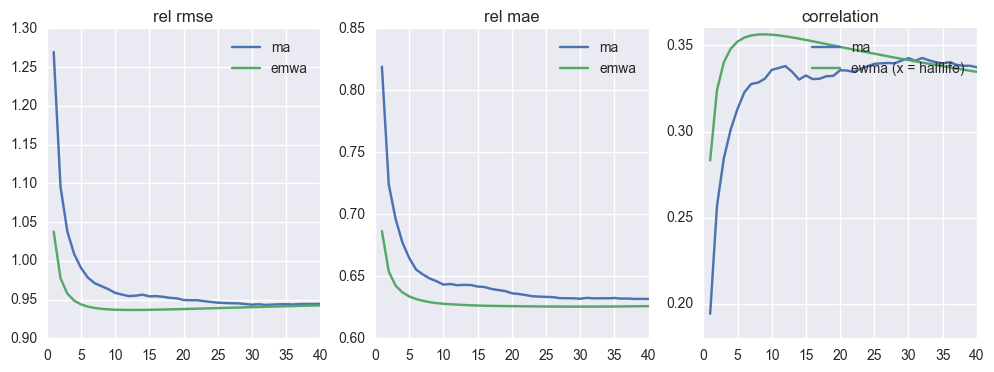

--------------- DD -------------------
DD vol mean: 0.0130085477105 median 0.00968155901456 std 0.0125854882991


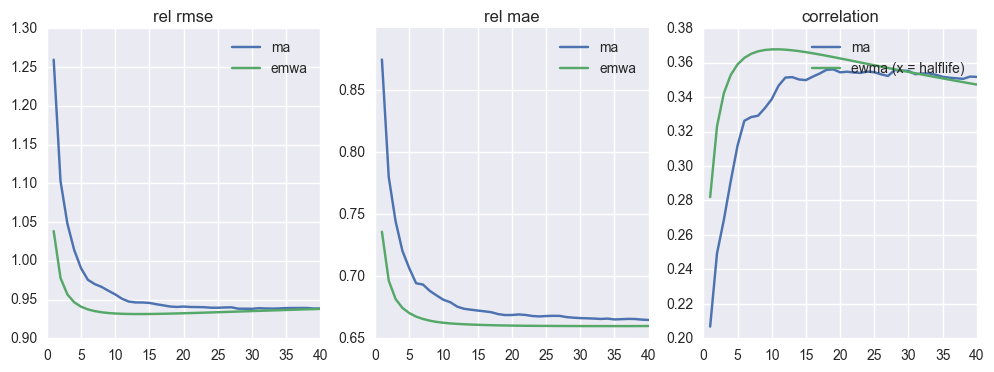

--------------- MDT -------------------
MDT vol mean: 0.0139386863726 median 0.0101692545157 std 0.0138085509795


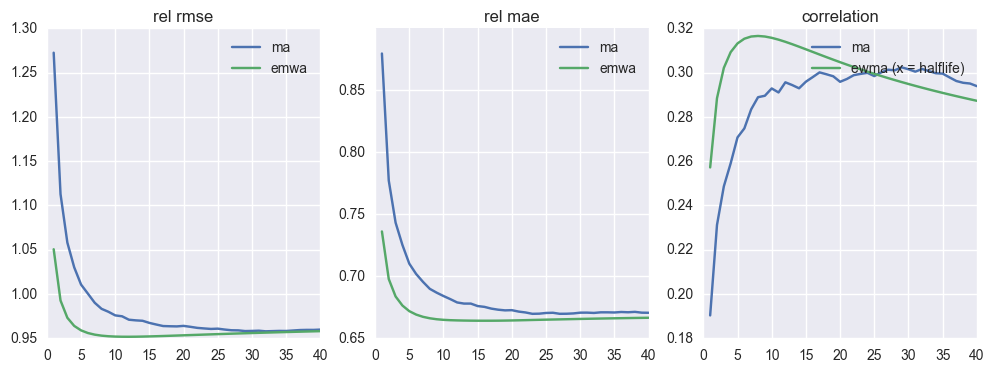

--------------- PG -------------------
PG vol mean: 0.0107728109511 median 0.007857266631 std 0.0116574622554


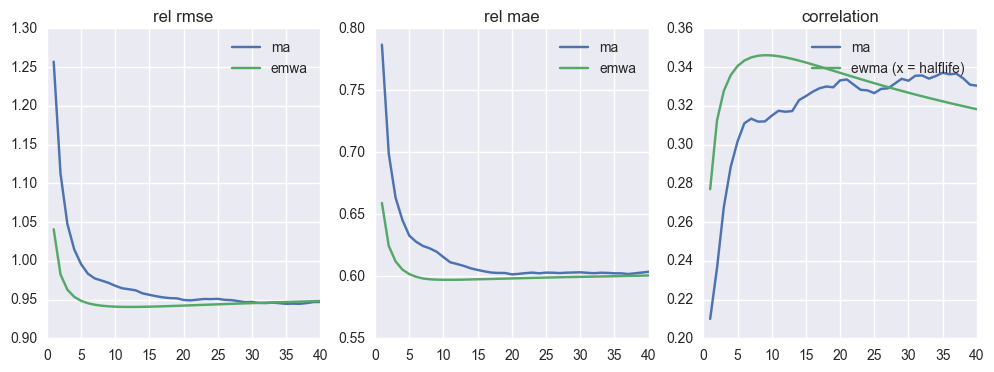

--------------- UNP -------------------
UNP vol mean: 0.0123746526953 median 0.0091335828328 std 0.0118614697385


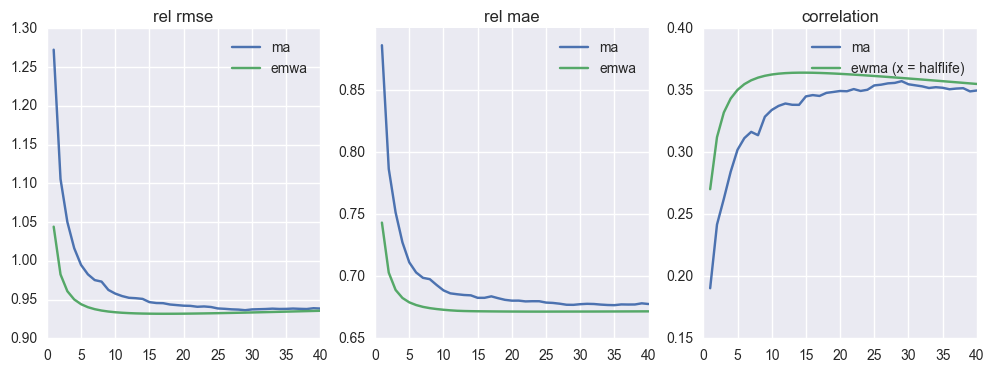

--------------- C -------------------
C vol mean: 0.0170461857823 median 0.0112995542999 std 0.0216904518135


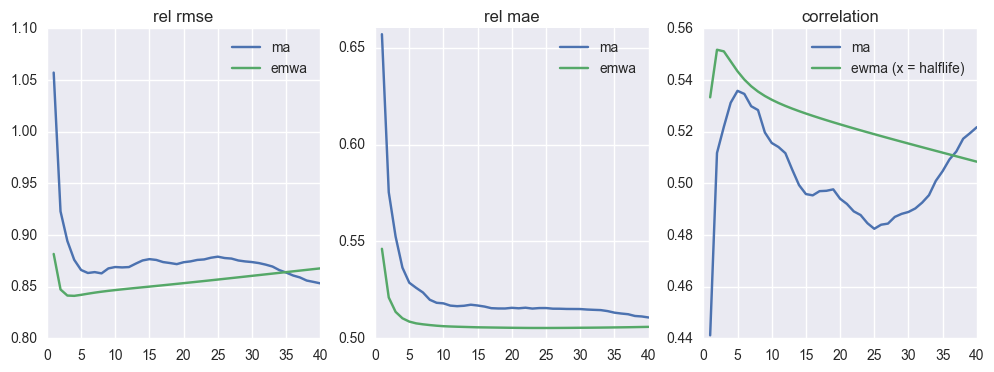

--------------- HAL -------------------
HAL vol mean: 0.019500200113 median 0.014383429159 std 0.0204831229646


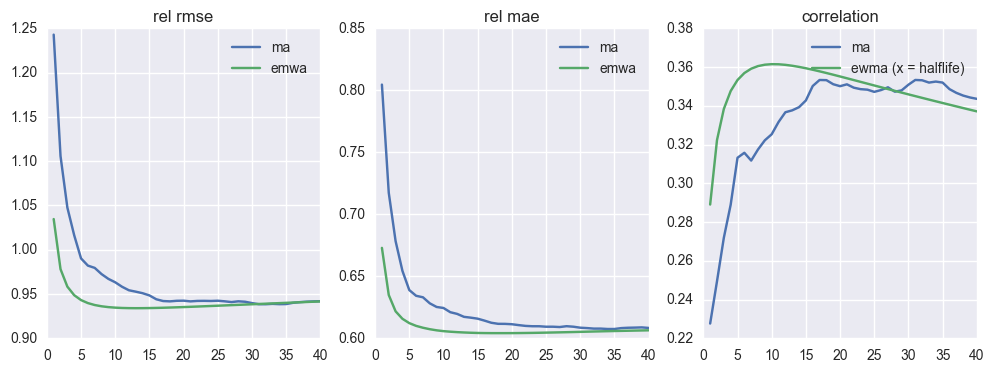

--------------- OXY -------------------
OXY vol mean: 0.014219910571 median 0.0107525704971 std 0.0145003018912


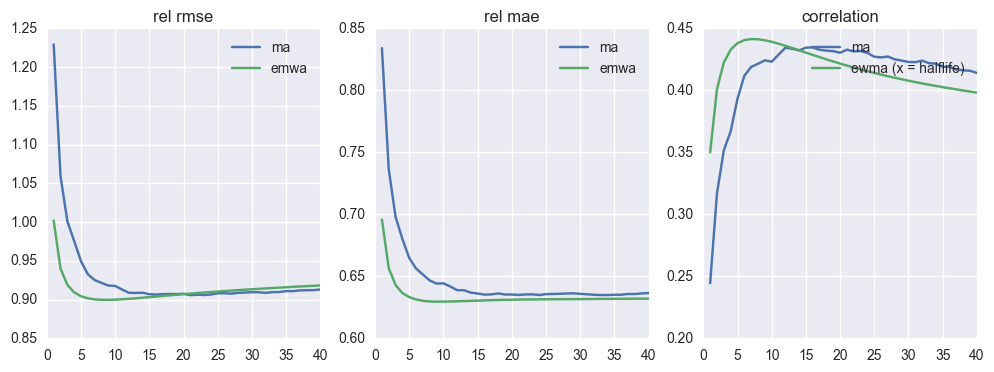

--------------- INTC -------------------
INTC vol mean: 0.0196453504419 median 0.0148637035486 std 0.0187059632496


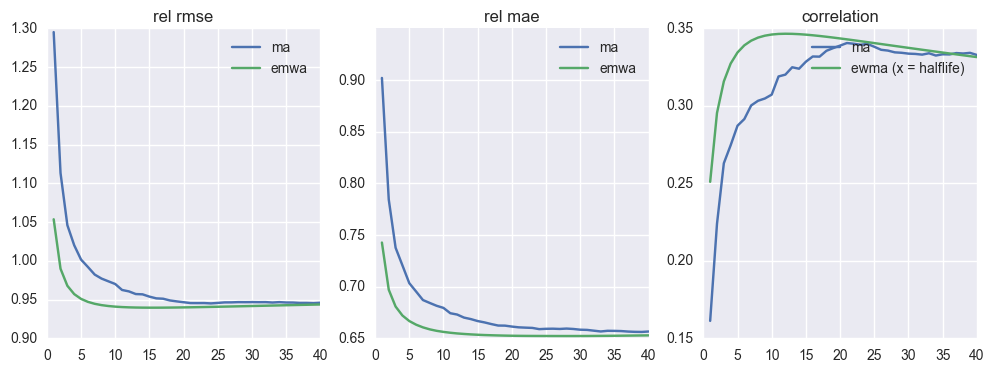

--------------- CL -------------------
CL vol mean: 0.0113670803235 median 0.00828427183939 std 0.0115571720745


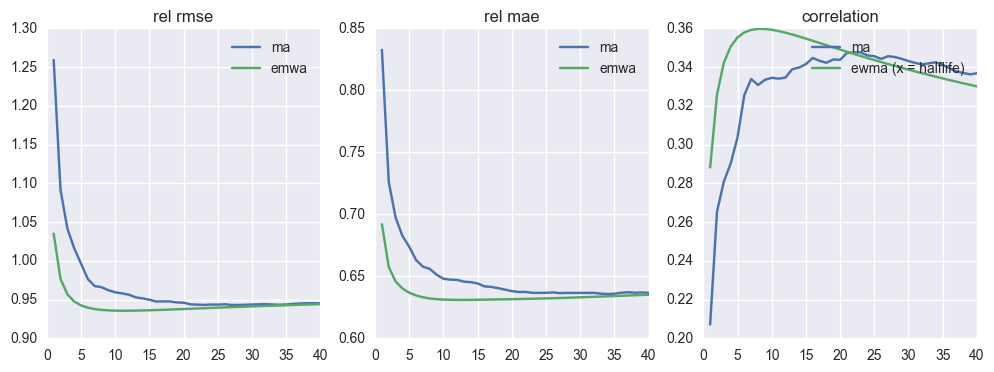

--------------- GILD -------------------
GILD vol mean: 0.0254880309778 median 0.0176940080892 std 0.0265908741976


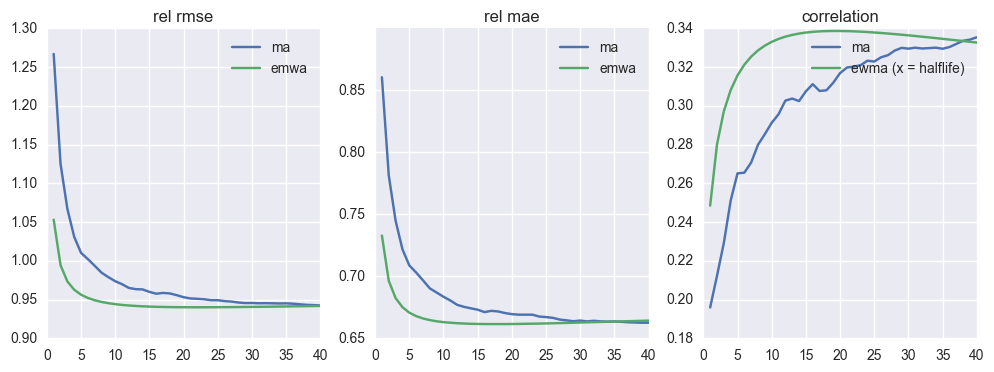

--------------- HPQ -------------------
HPQ vol mean: 0.0180180601268 median 0.0132126671302 std 0.018093195246


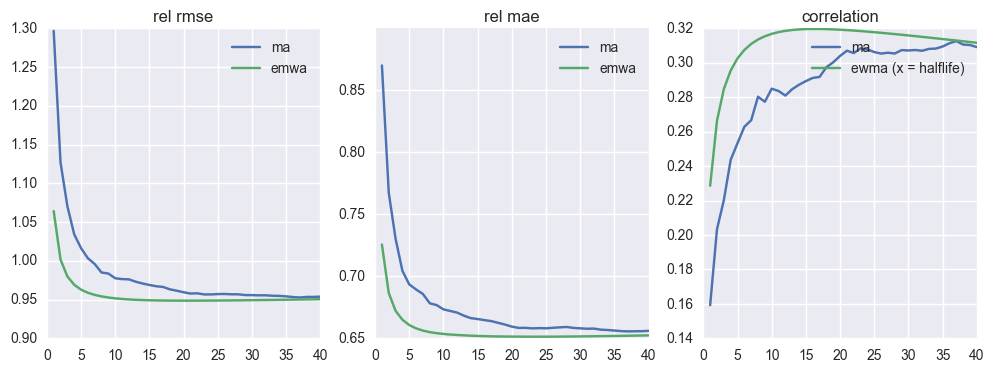

--------------- DELL -------------------
DELL vol mean: 0.023934040206 median 0.0175059076133 std 0.0229605472612


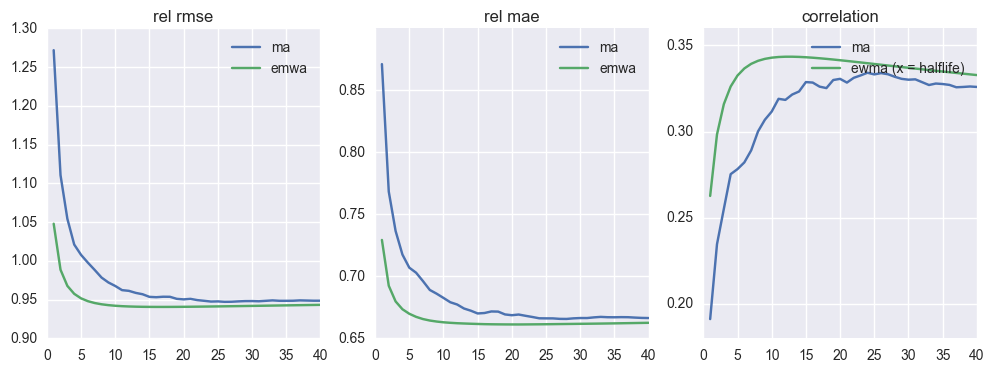

--------------- SPG -------------------
SPG vol mean: 0.0129911066034 median 0.00823041683605 std 0.0179753141431


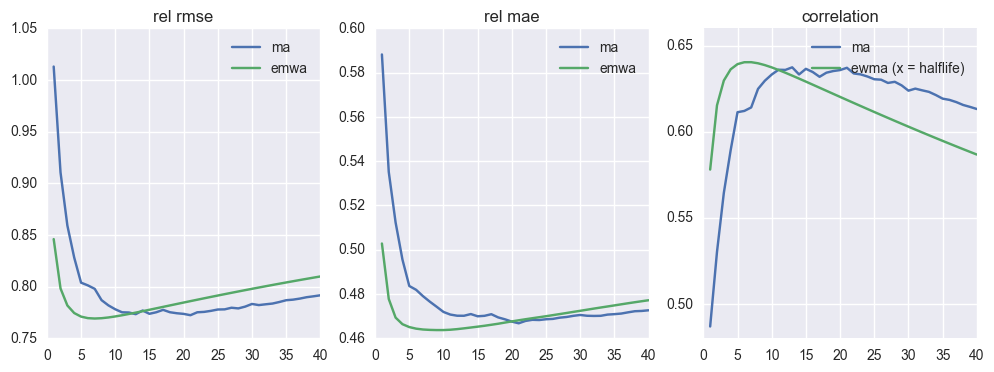

--------------- CVS -------------------
CVS vol mean: 0.0140256078591 median 0.0100503068406 std 0.0149864255379


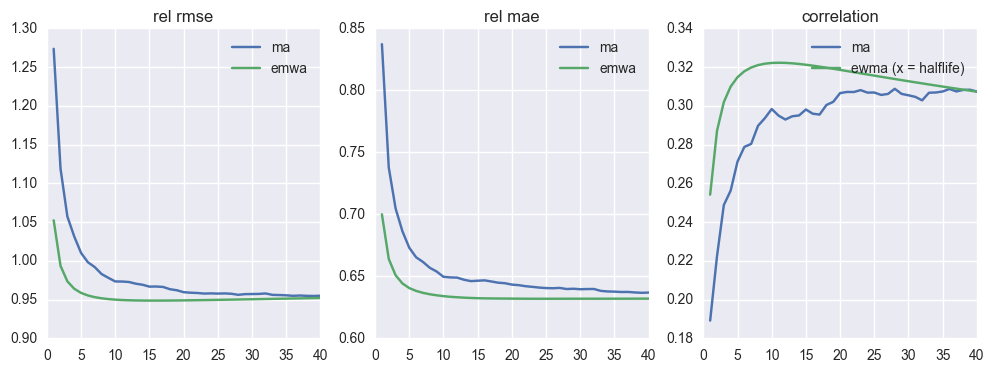

--------------- TWX -------------------
TWX vol mean: 0.0234918980657 median 0.0157546357282 std 0.024508107056


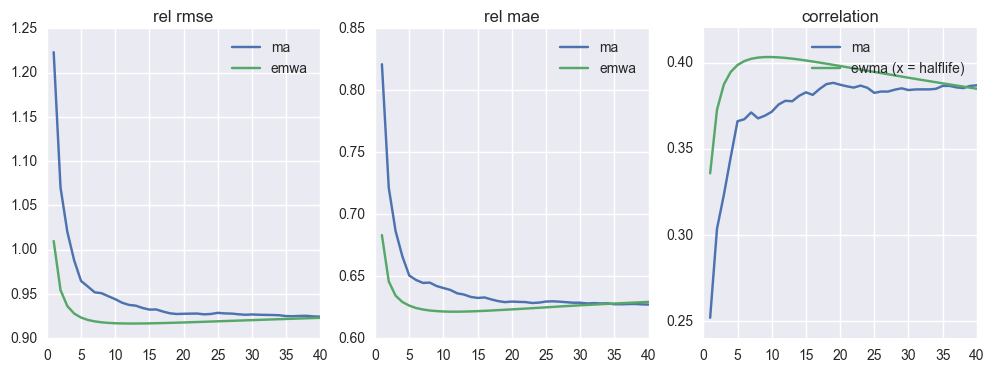

--------------- GE -------------------
GE vol mean: 0.0122600890638 median 0.00871358406644 std 0.0129049338678


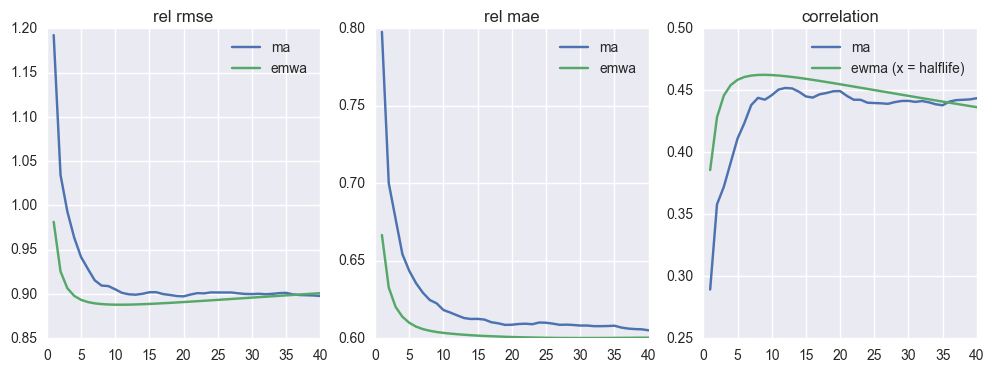

--------------- ABT -------------------
ABT vol mean: 0.012678520394 median 0.00955427858318 std 0.0120591579184


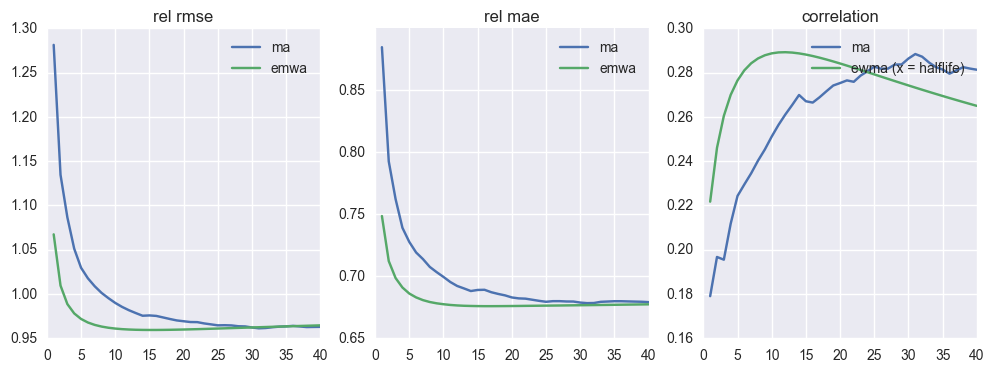

--------------- T -------------------
T vol mean: 0.0128126121032 median 0.00925942199023 std 0.0127116323092


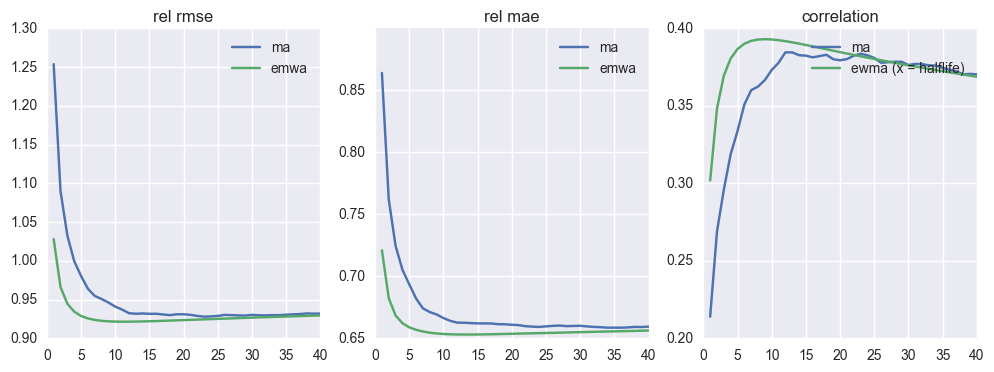

--------------- JNJ -------------------
JNJ vol mean: 0.0108516991311 median 0.00789942517054 std 0.0104292621343


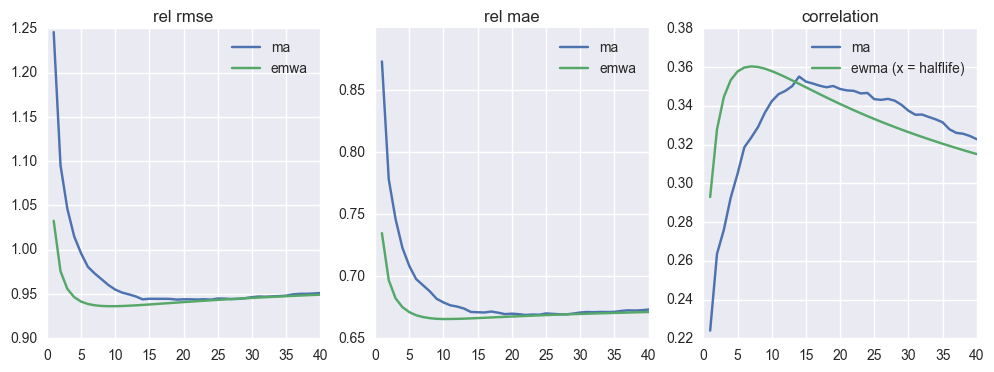

--------------- UNH -------------------
UNH vol mean: 0.0177141040783 median 0.0127042576363 std 0.019558682331


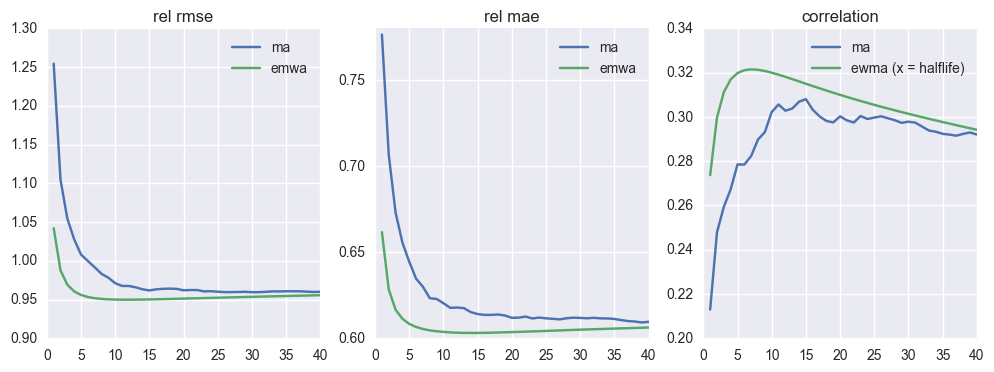

--------------- PFE -------------------
PFE vol mean: 0.0136758932231 median 0.0103606646143 std 0.0126453484102


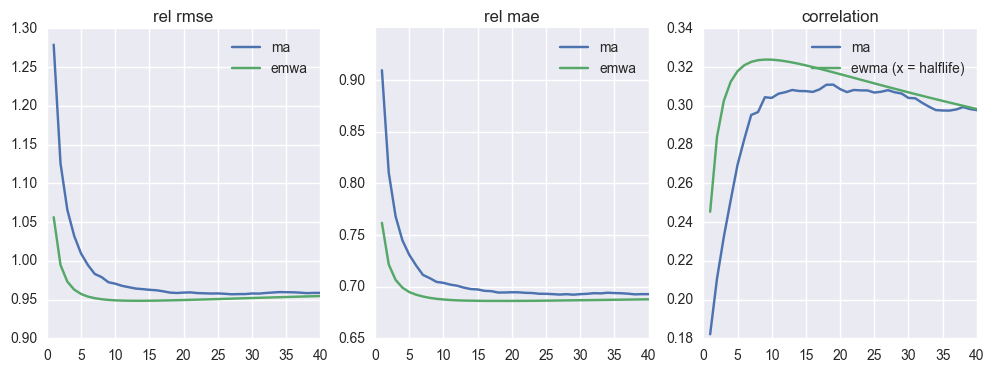

--------------- UTX -------------------
UTX vol mean: 0.0125840204638 median 0.00914248221553 std 0.0128023841153


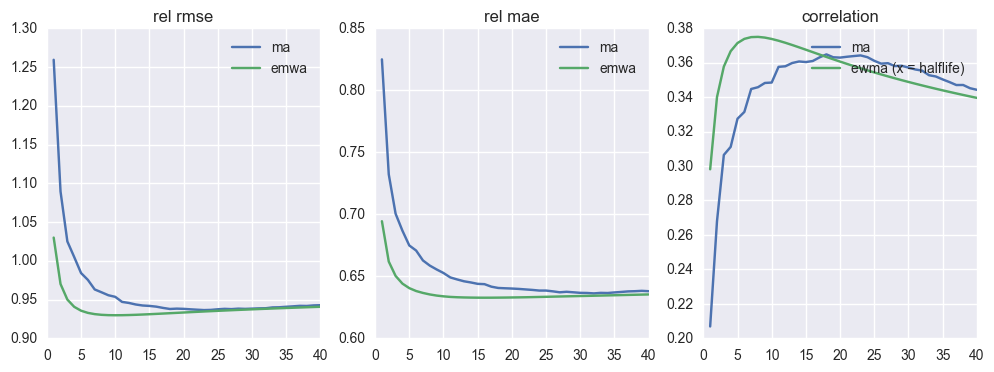

--------------- TXN -------------------
TXN vol mean: 0.0218059300721 median 0.0163316961536 std 0.0202222764975


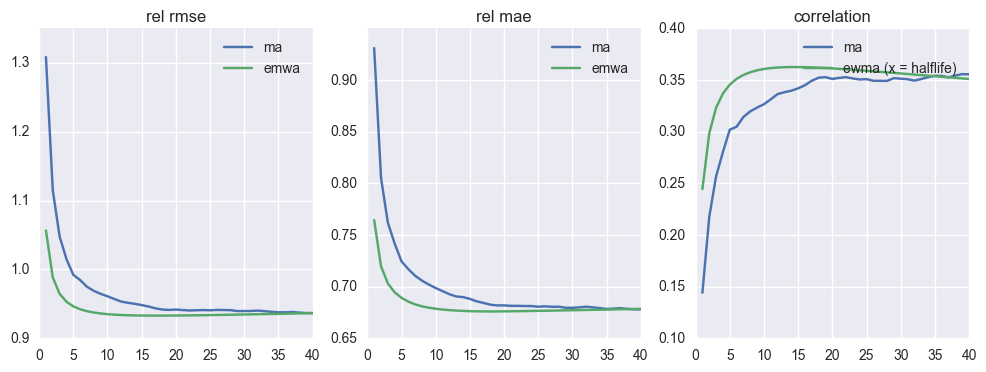

--------------- DHR -------------------
DHR vol mean: 0.0128345392572 median 0.00935199367086 std 0.0127784272452


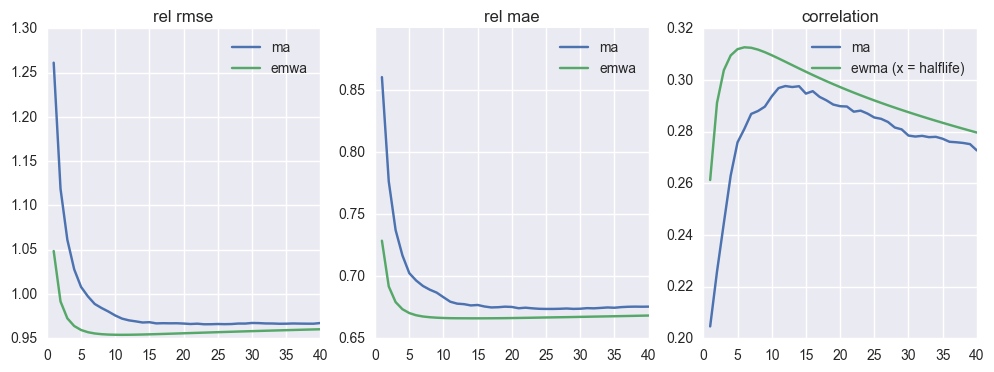

--------------- SLB -------------------
SLB vol mean: 0.0164720890099 median 0.0124853571034 std 0.0156297486038


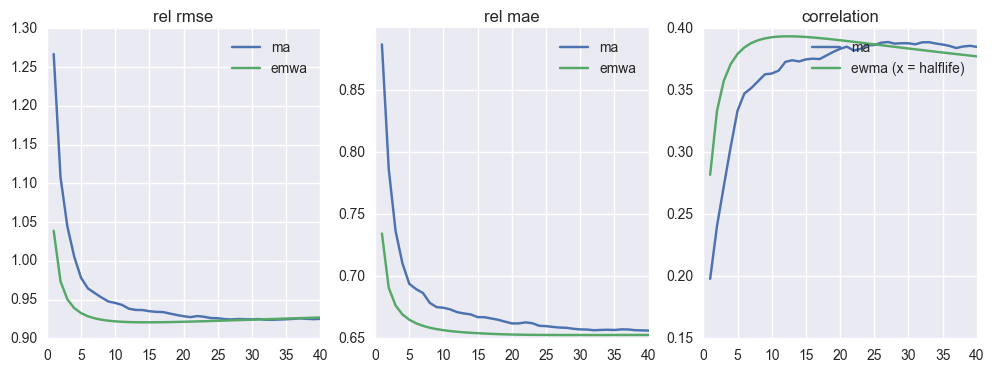

--------------- WMT -------------------
WMT vol mean: 0.0135375434399 median 0.010096348808 std 0.0127566650379


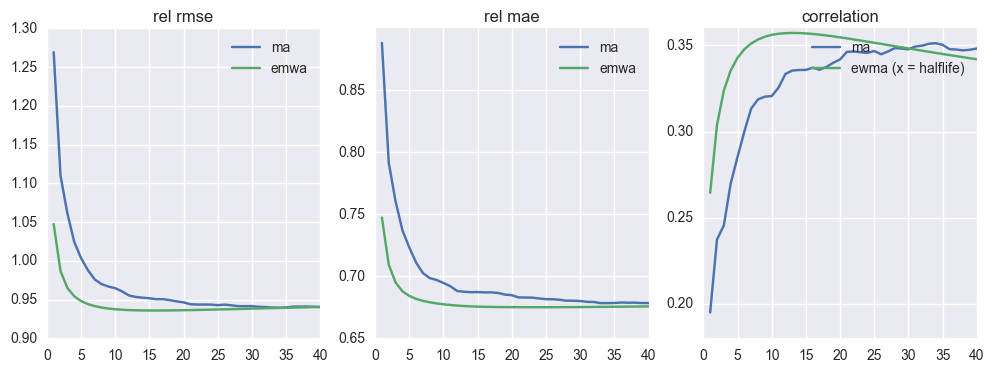

--------------- VZ -------------------
VZ vol mean: 0.0124708628447 median 0.00923945091906 std 0.0121803142746


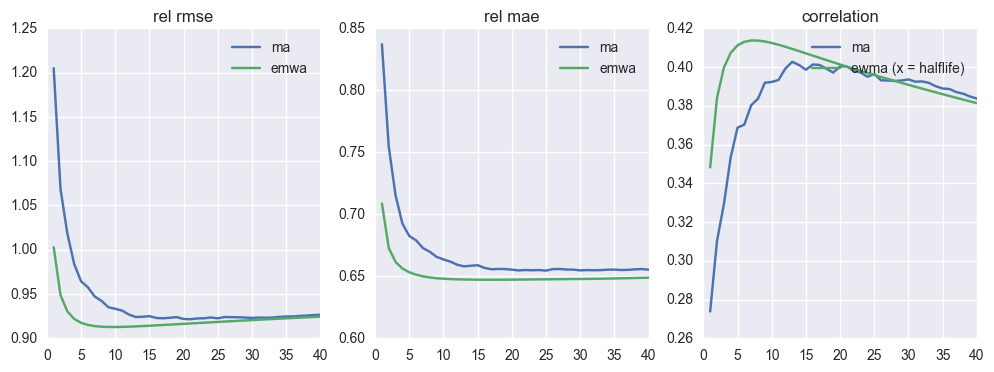

--------------- CELG -------------------
CELG vol mean: 0.028308593969 median 0.0199211001692 std 0.0289098879919


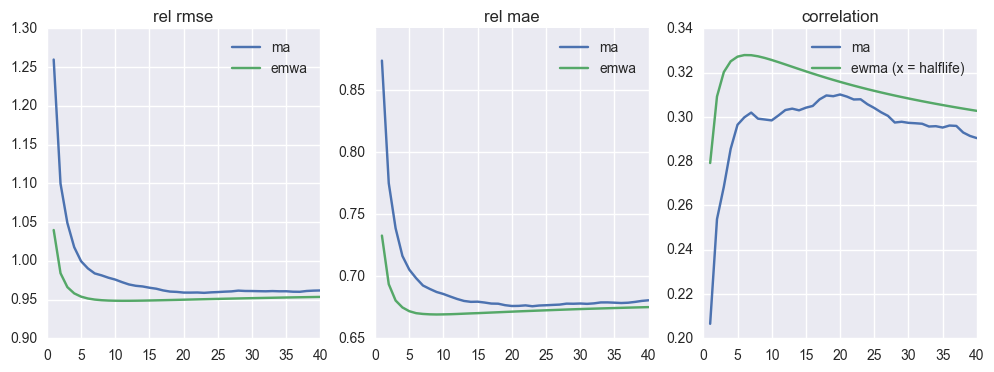

--------------- JPM -------------------
JPM vol mean: 0.0167882107488 median 0.0112750603041 std 0.0188268694448


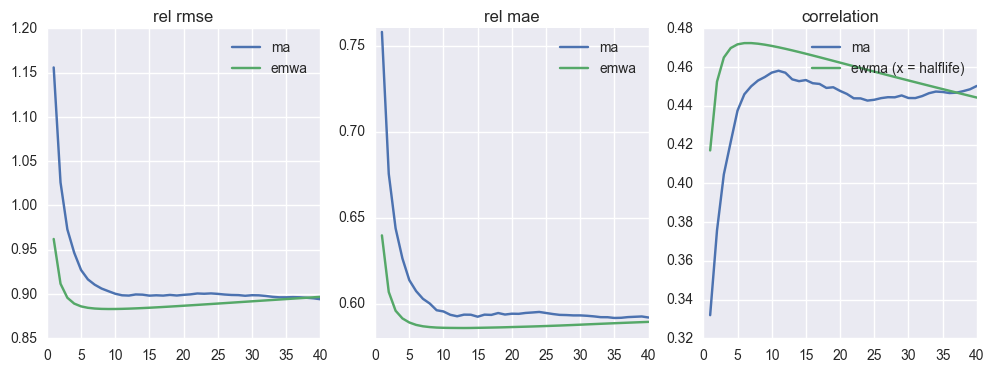

--------------- NKE -------------------
NKE vol mean: 0.0156078269405 median 0.0107276638985 std 0.0162086587704


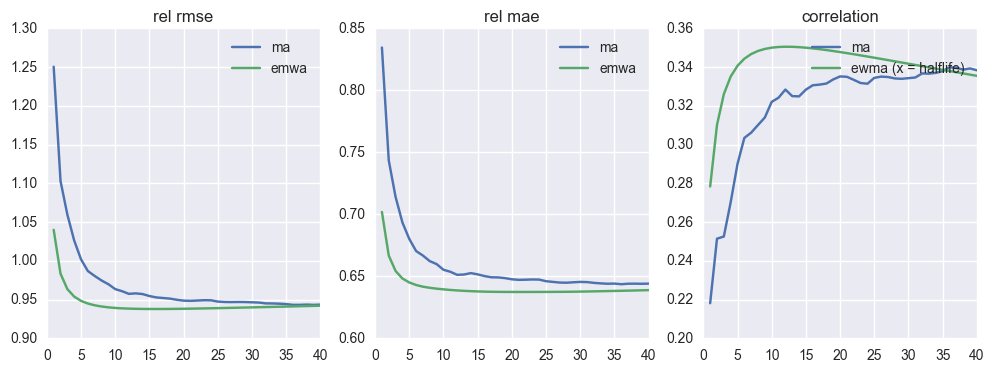

--------------- MRK -------------------
MRK vol mean: 0.0130812341838 median 0.00979427498783 std 0.0133761669989


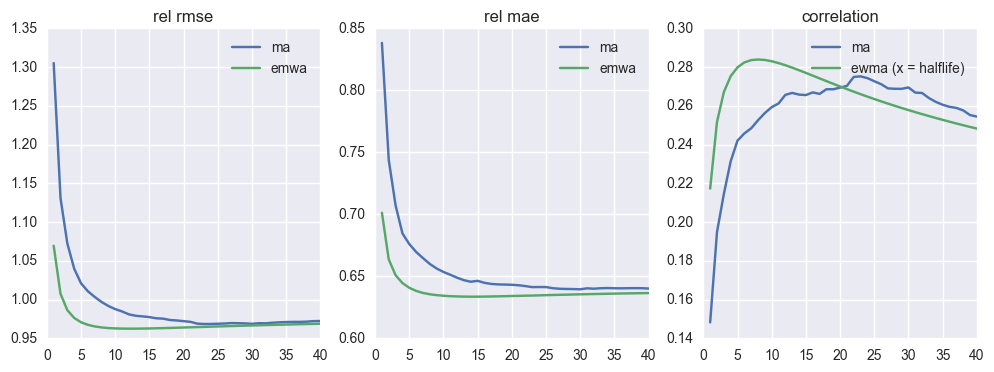

--------------- MO -------------------
MO vol mean: 0.0127011514607 median 0.00880541723324 std 0.0141180124949


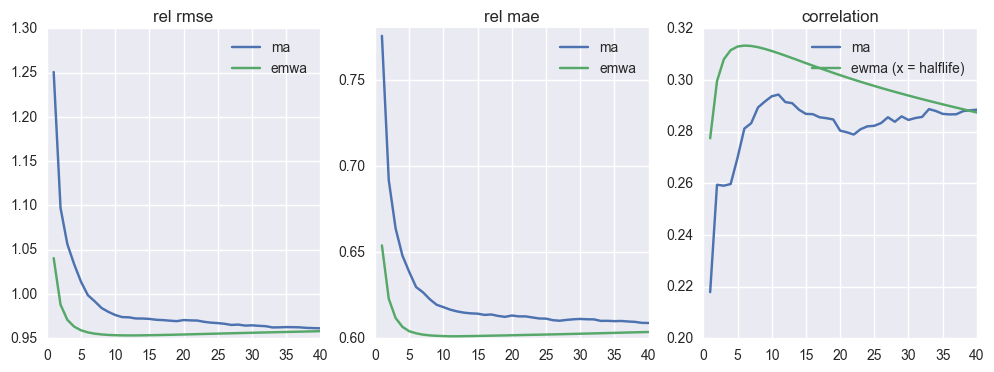

--------------- MCD -------------------
MCD vol mean: 0.0124984776159 median 0.00972905000103 std 0.0116203120567


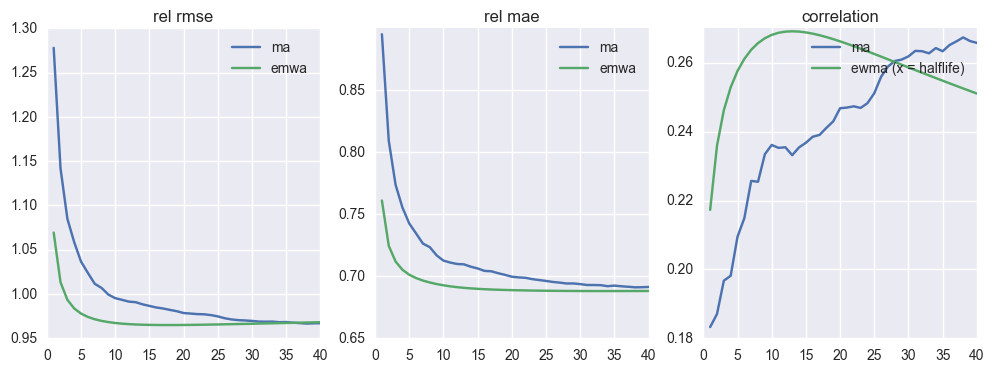

--------------- CSCO -------------------
CSCO vol mean: 0.0216163671323 median 0.0160920688108 std 0.0207487972276


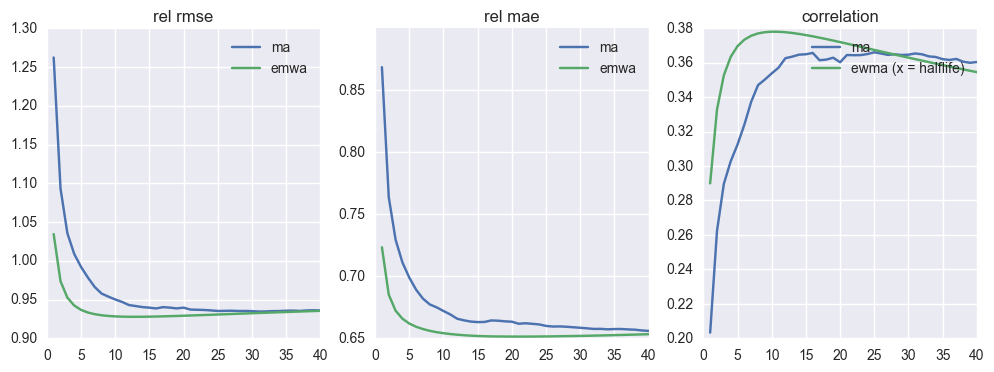

--------------- MMM -------------------
MMM vol mean: 0.0105802225529 median 0.0076372688368 std 0.0106810359362


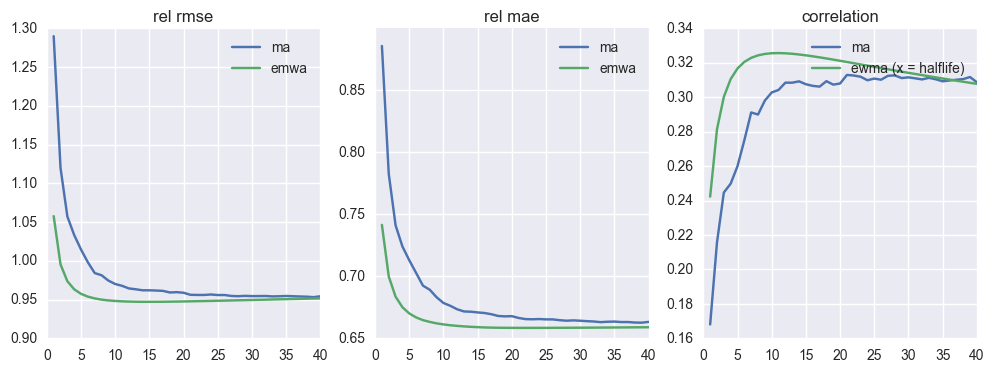

--------------- SP500 -------------------
SP500 vol mean: 0.00770086214069 median 0.00533314868218 std 0.00849968140478


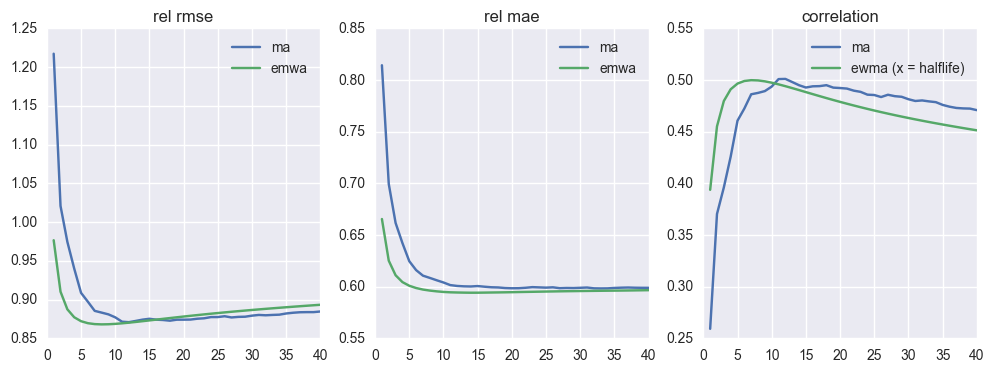

--------------- SO -------------------
SO vol mean: 0.00924513679742 median 0.00675944409946 std 0.00894165018341


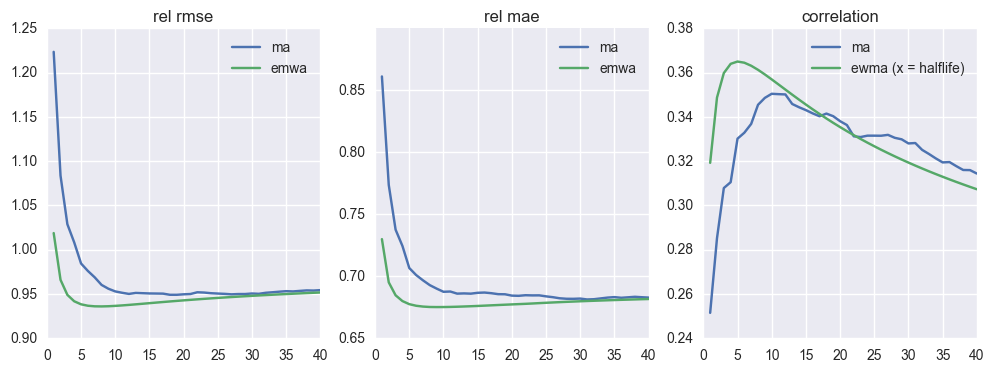

--------------- MS -------------------
MS vol mean: 0.0203979445022 median 0.0134995928398 std 0.0256695762094


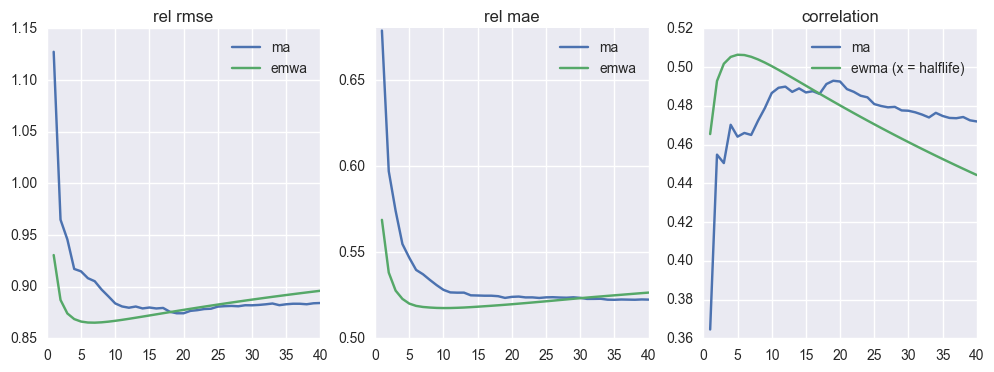

--------------- APC -------------------
APC vol mean: 0.0170979351361 median 0.0128776731503 std 0.0166730011508


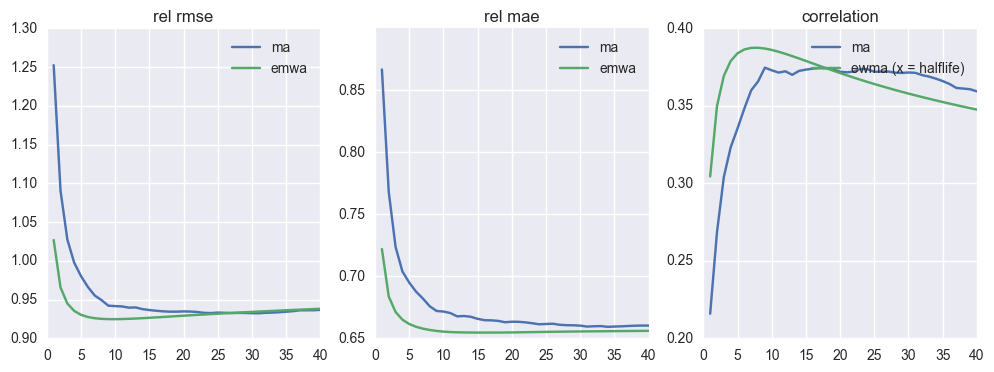

--------------- PNC -------------------
PNC vol mean: 0.0136750724414 median 0.00929006499194 std 0.0172060301001


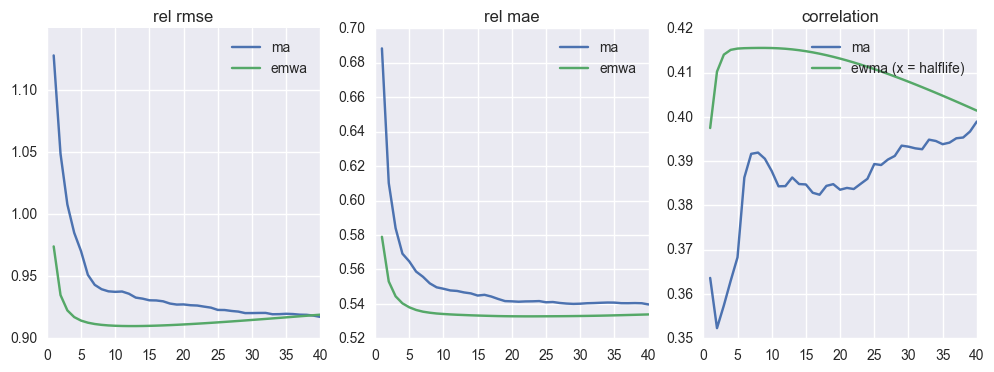

--------------- APA -------------------
APA vol mean: 0.0179455644684 median 0.0140842805736 std 0.016731410289


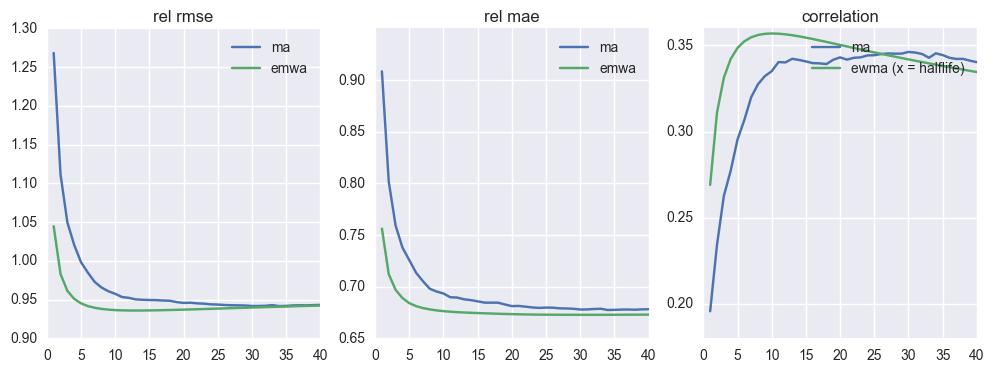

--------------- EXC -------------------
EXC vol mean: 0.0113847979365 median 0.00846621643849 std 0.0118194428825


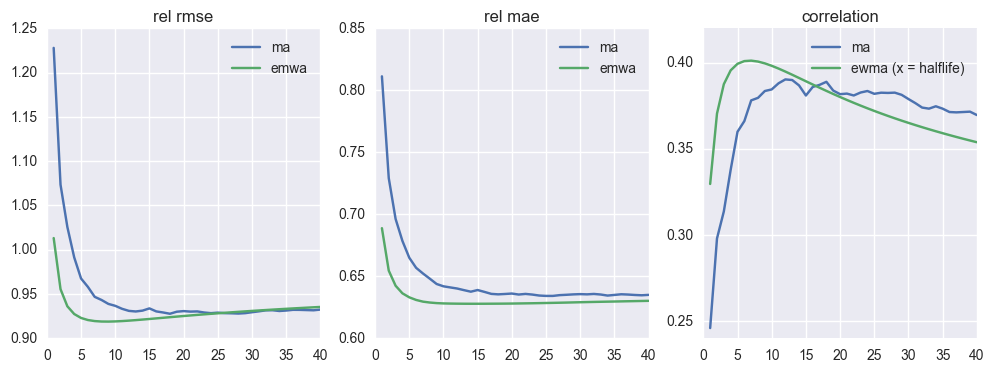

--------------- PX -------------------
PX vol mean: 0.0146957112321 median 0.0110894615373 std 0.0142011329216


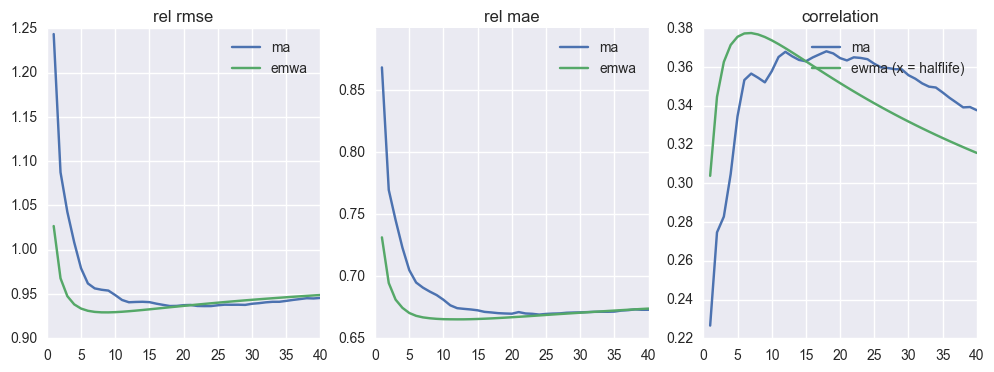

--------------- CMCSA -------------------
CMCSA vol mean: 0.0182727910049 median 0.0129591477833 std 0.018545457559


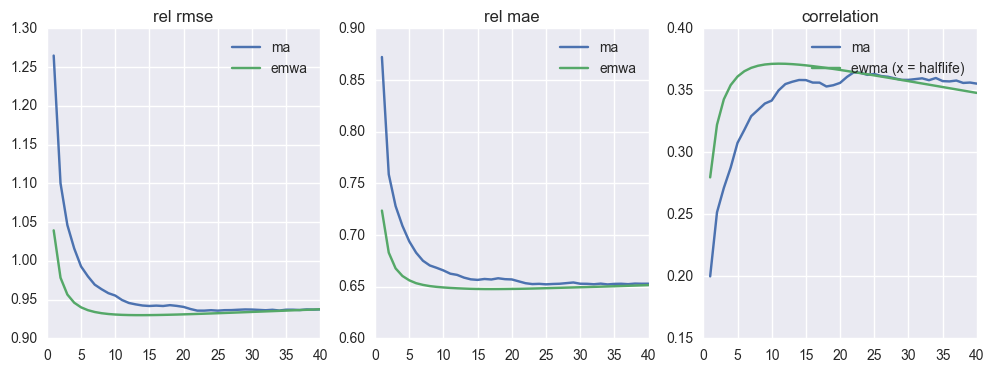

--------------- LOW -------------------
LOW vol mean: 0.0176276553968 median 0.0130319482594 std 0.017181544922


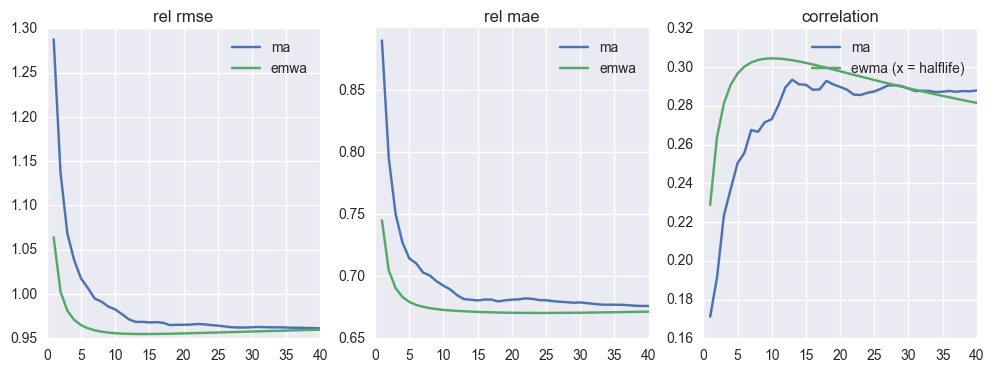

In [15]:
for sym in data.keys():
    print "---------------", sym, "-------------------"
    plot_error_charts(data, sym)
    plt.show()

vol mean: 0.0173130270478 median 0.0127219430153 std 0.0187235748903


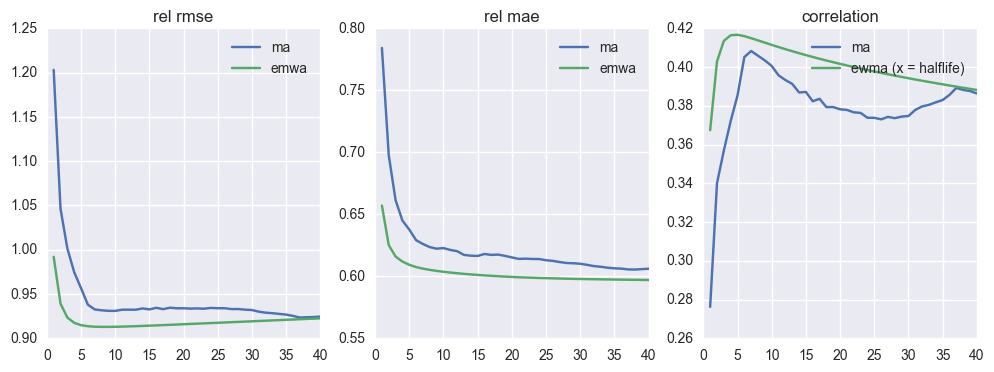

In [13]:
plot_error_charts(data, 'F')

In [ ]:

???? extract to function calculating scores
??? fun whole over all data sets
?? get aggregate statistics

?? compute them on dev set too, to check that dev set is representative
?? then compare dev set performance from learned model.